# Porter
Porter is India's Largest Marketplace for Intra-City Logistics. Leader in the country's $40 billion intra-city logistics market, Porter strives to improve the lives of 1,50,000+ driver-partners by providing them with consistent earning & independence. Currently, the company has serviced 5+ million customers

Porter works with a wide range of restaurants for delivering their items directly to the people.

Porter has a number of delivery partners available for delivering the food, from various restaurants and wants to get an estimated delivery time that it can provide the customers on the basis of what they are ordering, from where and also the delivery partners.

This dataset has the required data to train a regression model that will do the delivery time estimation, based on all those features

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Make numpy values easier to read.
np.set_printoptions(precision=3, suppress=True)

import warnings

# Ignore future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
plt.style.use("seaborn-v0_8-notebook")
%matplotlib inline

### <font color='289C4E'>Table of contents<font><a class='anchor' id='top'></a>
1. [Data Dictionary](#data)
2. [Univariate Analysis](#univariate)
3. [Bivariate Analysis](#bivariate)
4. [Multivariate Analysis](#multivariate)
5. [Data Preprocessing and Feature Engineering](#feature_eng)
6. [Change cell background colors](#background)

# 1. Data Dictionary <a class='anchor' id='data'></a> [↑](#top)


Each row in this file corresponds to one unique delivery. Each column corresponds to a feature as explained below.

* market_id : integer id for the market where the restaurant lies
* actual_delivery_time : the timestamp when the order was delivered
* created_at : the timestamp at which the order was placed
* store_primary_category : category for the restaurant
* order_protocol : integer code value for order protocol(how the order was placed ie: through porter, call to restaurant, pre booked, third part etc)
* total_items subtotal : final price of the order
* num_distinct_items : the number of distinct items in the order
* min_item_price : price of the cheapest item in the order
* max_item_price : price of the costliest item in order
* total_onshift_partners : number of delivery partners on duty at the time order was placed
* total_busy_partners : number of delivery partners attending to other tasks
* total_outstanding_orders : total number of orders to be fulfilled at the moment

In [2]:
porter = pd.read_csv("data/porter.csv", parse_dates=['created_at', 'actual_delivery_time'])
porter.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,f0ade77b43923b38237db569b016ba25,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,f0ade77b43923b38237db569b016ba25,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,f0ade77b43923b38237db569b016ba25,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0


In [3]:
porter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 196441 non-null  float64       
 1   created_at                197428 non-null  datetime64[ns]
 2   actual_delivery_time      197421 non-null  datetime64[ns]
 3   store_id                  197428 non-null  object        
 4   store_primary_category    192668 non-null  object        
 5   order_protocol            196433 non-null  float64       
 6   total_items               197428 non-null  int64         
 7   subtotal                  197428 non-null  int64         
 8   num_distinct_items        197428 non-null  int64         
 9   min_item_price            197428 non-null  int64         
 10  max_item_price            197428 non-null  int64         
 11  total_onshift_partners    181166 non-null  float64       
 12  to

In [4]:
porter.describe()

,market_id,created_at,actual_delivery_time,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
count,196441.000000,197428,197421,196433.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,181166.000000,181166.000000,181166.000000
mean,2.978706,2015-02-04 22:00:09.537962752,2015-02-04 22:48:23.348914432,2.882352,3.196391,2682.331402,2.670791,686.218470,1159.588630,44.808093,41.739747,58.050065
min,1.000000,2014-10-19 05:24:15,2015-01-21 15:58:11,1.000000,1.000000,0.000000,1.000000,-86.000000,0.000000,-4.000000,-5.000000,-6.000000
25%,2.000000,2015-01-29 02:32:42,2015-01-29 03:22:29,1.000000,2.000000,1400.000000,1.000000,299.000000,800.000000,17.000000,15.000000,17.000000
50%,3.000000,2015-02-05 03:29:09.500000,2015-02-05 04:40:41,3.000000,3.000000,2200.000000,2.000000,595.000000,1095.000000,37.000000,34.000000,41.000000
75%,4.000000,2015-02-12 01:39:18.500000,2015-02-12 02:25:26,4.000000,4.000000,3395.000000,3.000000,949.000000,1395.000000,65.000000,62.000000,85.000000
max,6.000000,2015-02-18 06:00:44,2015-02-19 22:45:31,7.000000,411.000000,27100.000000,20.000000,14700.000000,14700.000000,171.000000,154.000000,285.000000
std,1.524867,NaN,NaN,1.503771,2.666546,1823.093688,1.630255,522.038648,558.411377,34.526783,32.145733,52.661830


In [5]:
porter.describe(include='object')

,store_id,store_primary_category
count,197428,192668
unique,6743,74
top,d43ab110ab2489d6b9b2caa394bf920f,american
freq,937,19399


In [6]:
porter[porter.columns[porter.isnull().any()]].isnull().sum()

market_id                     987
actual_delivery_time            7
store_primary_category       4760
order_protocol                995
total_onshift_partners      16262
total_busy_partners         16262
total_outstanding_orders    16262
dtype: int64

In [7]:
porter.dropna().shape

(176248, 14)

In [8]:
porter.nunique(dropna=True)

market_id                        6
created_at                  180985
actual_delivery_time        178110
store_id                      6743
store_primary_category          74
order_protocol                   7
total_items                     57
subtotal                      8368
num_distinct_items              20
min_item_price                2312
max_item_price                2652
total_onshift_partners         172
total_busy_partners            159
total_outstanding_orders       281
dtype: int64

In [9]:
porter.dropna(inplace=True)

In [10]:
porter.shape

(176248, 14)

# 2. Univariate Analysis <a class='anchor' id='univariate' ></a> [↑](#top)

In [11]:
df = porter.copy()

In [12]:
timestamp_cols = df.select_dtypes(include='datetime').columns
cat_cols = ['store_primary_category', 'order_protocol', 'total_items', 'num_distinct_items']
num_cols = ['subtotal', 'min_item_price', 'max_item_price', 'total_onshift_partners', 'total_busy_partners', 'total_outstanding_orders']
obj_cols = df.select_dtypes(include='object').columns

In [13]:
df = (porter
          .assign(
              est_delivery_time =(porter.actual_delivery_time - porter.created_at).astype('int64')/ (10**9),
              created_at_day=porter.created_at.dt.day,
              created_at_weekday=porter.created_at.dt.weekday,
              created_at_hour = porter.created_at.dt.hour,
              )
)

In [14]:
# functions to annotate bars in bar chart

def with_hue(ax, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in ax.patches]
    patch = [p for
             p in ax.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage = '{:.1f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - .1
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height()
            ax.annotate(percentage, (x, y), fontsize=10, color='black')

# example : with_hue(ax,g1.Content_Type,2,2)

def without_hue(ax, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2.
        y = p.get_height()
        ax.annotate(percentage, (x, y), 
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10, color='black')

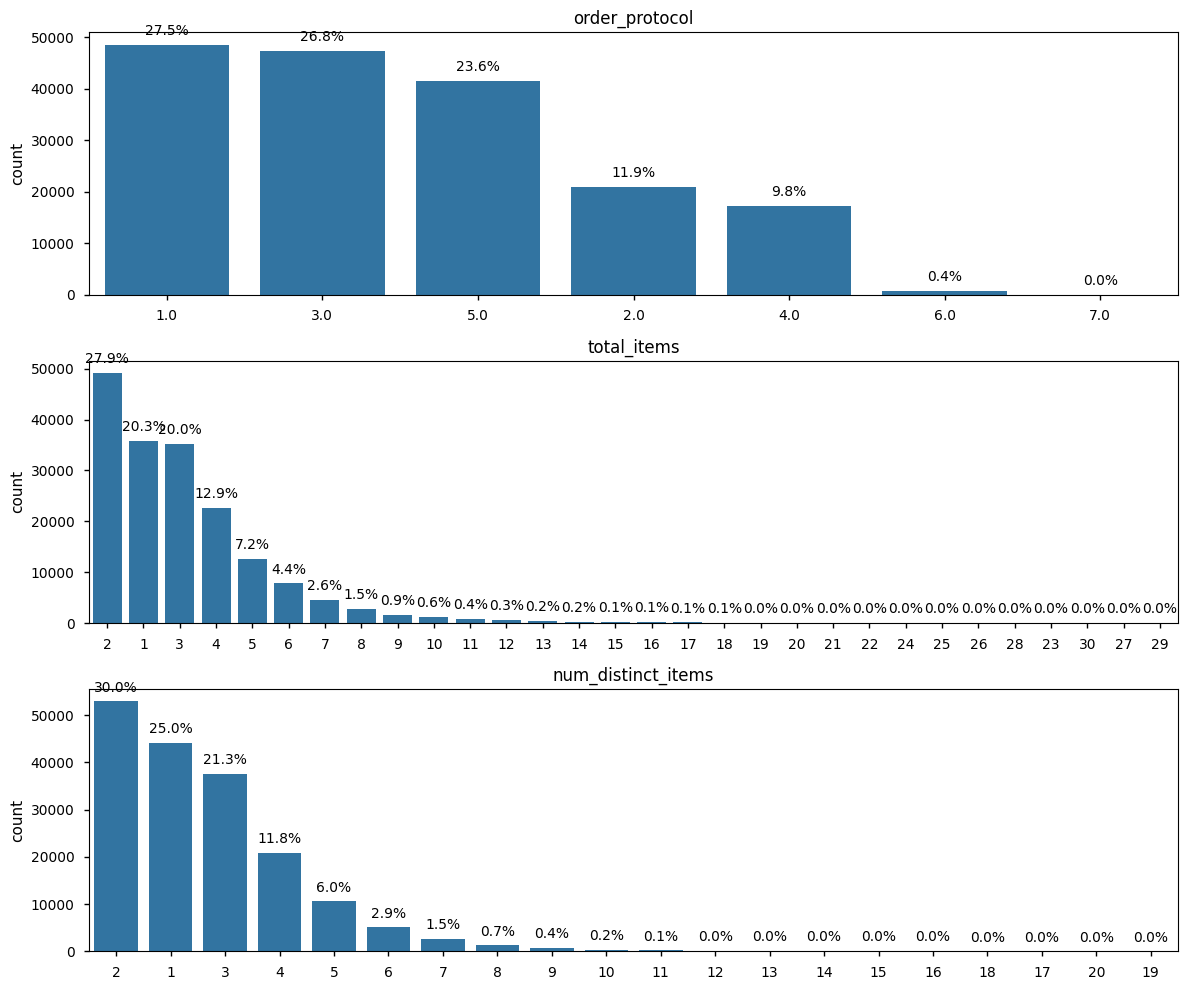

In [15]:
fig, axs = plt.subplots(nrows=len(cat_cols[1:]), ncols=1, figsize=(12,10))
plt.subplots_adjust(hspace=0.6)

for column, ax in zip(df[cat_cols[1:]], axs.ravel()):
    sns.countplot(x=df[column], ax=ax, order = df[column].value_counts().head(30).index)
    ax.set_title(column)
    ax.set_xlabel('')
    without_hue(ax, df[column])
plt.tight_layout()
plt.show()

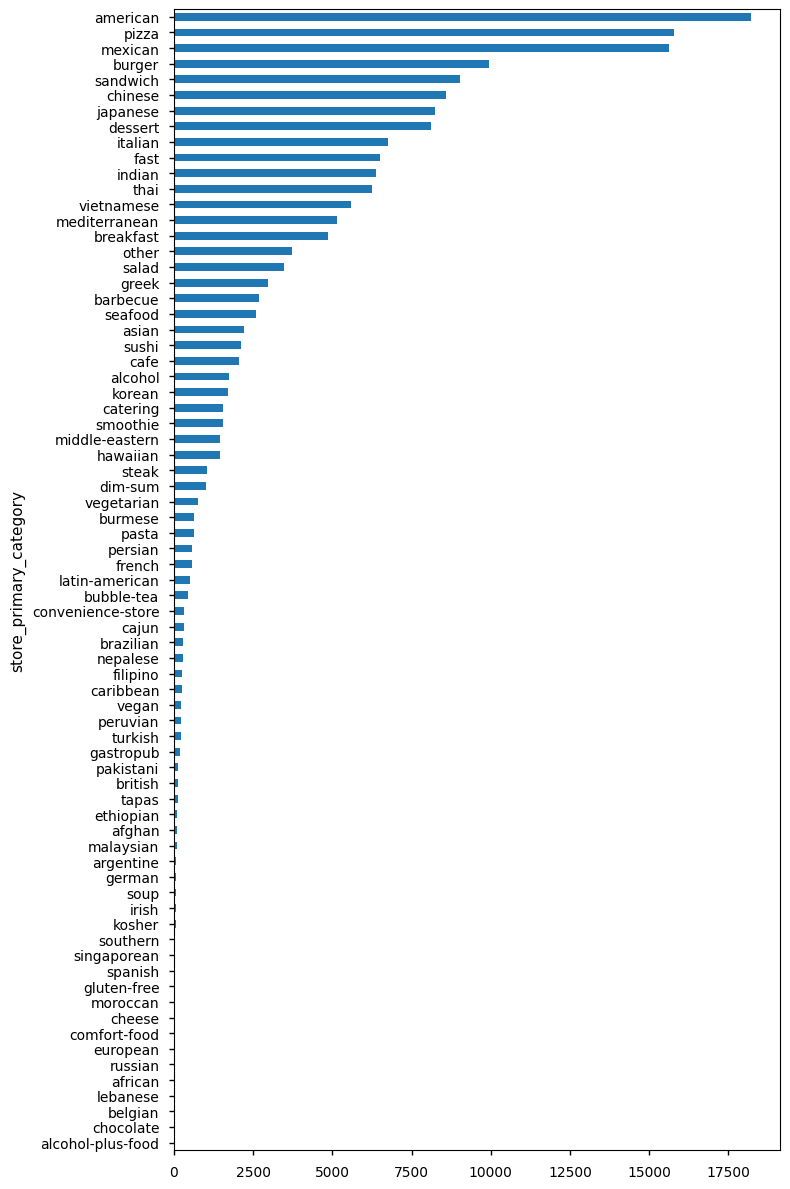

In [16]:
plt.figure(figsize=(8,12))
ax = df.store_primary_category.value_counts().plot(kind='barh')
ax.invert_yaxis()  # Invert the y-axis
# plt.xticks(rotation=90)  # Rotate x-axis labels by 90 degrees
# plt.subplots_adjust(bottom=0.6)  # Adjust the bottom margin to make room for rotated labels
plt.tight_layout()
plt.show()

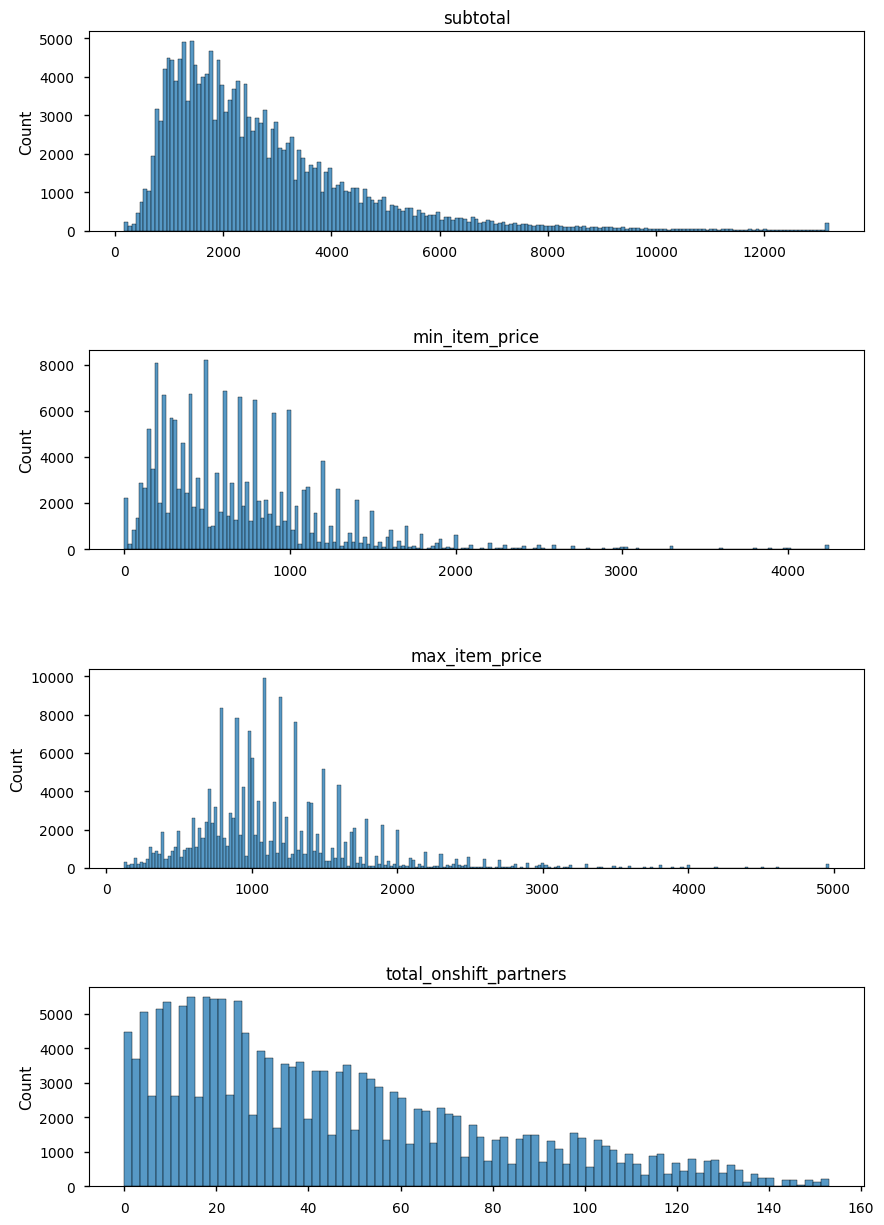

In [17]:
from scipy.stats.mstats import winsorize

fig, axs = plt.subplots(nrows=len(cat_cols), ncols=1, figsize=(10,15))
plt.subplots_adjust(hspace=0.6)

for column, ax in zip(df[num_cols], axs.ravel()):
    sns.histplot(x=winsorize(df[column], limits=[0.001, 0.001]).data, ax=ax)
    # winsorize does capping or truncating extreme values beyond a certain percentile.
    ax.set_title(column)
    ax.set_xlabel('')

plt.show()

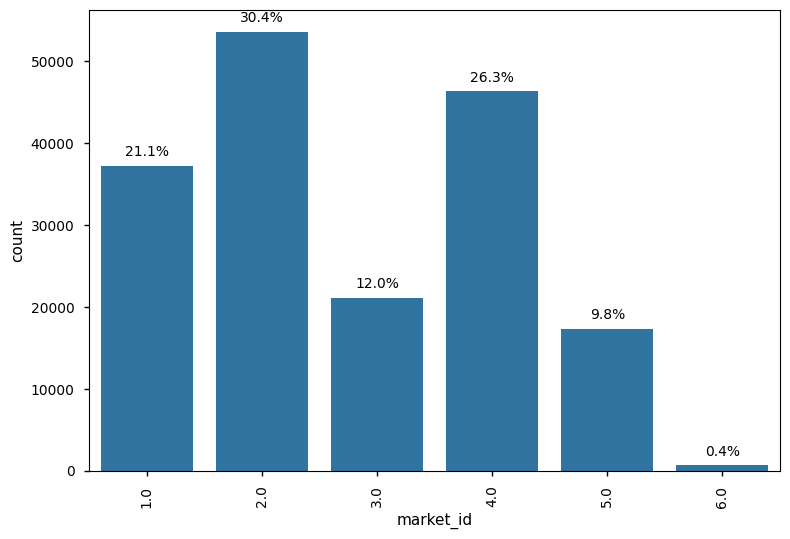

In [18]:
ax = sns.countplot(data=df,x="market_id")
plt.xticks(rotation='vertical')
without_hue(ax,df.market_id)
plt.tight_layout()

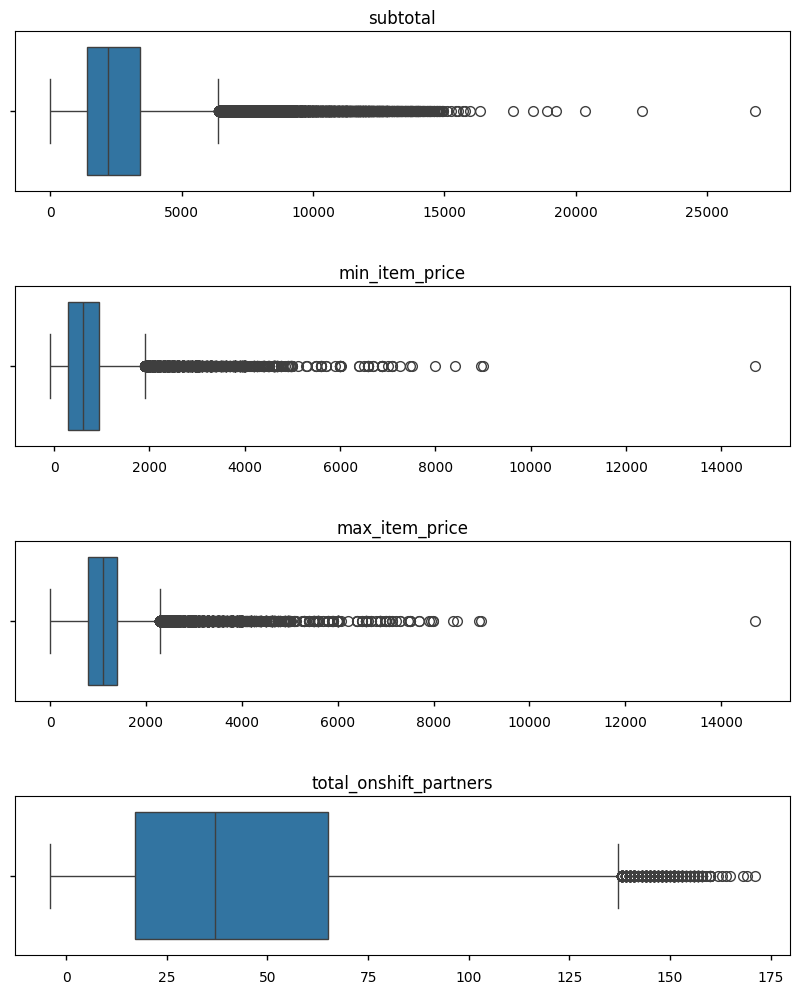

In [19]:
from scipy.stats.mstats import winsorize

fig, axs = plt.subplots(nrows=len(cat_cols), ncols=1, figsize=(10,12))
plt.subplots_adjust(hspace=0.6)

for column, ax in zip(df[num_cols], axs.ravel()):
    sns.boxplot(x=df[column], ax=ax)
    ax.set_title(column)
    ax.set_xlabel('')

plt.show()

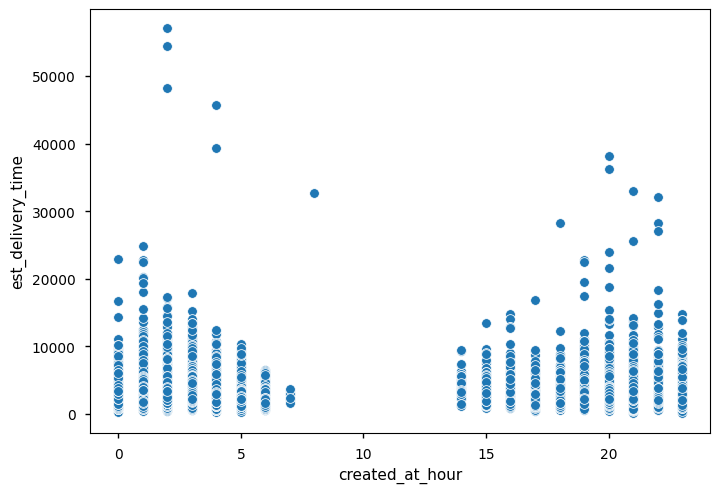

In [20]:
sns.scatterplot(data=df.query("est_delivery_time < 60000"), x="created_at_hour", y="est_delivery_time")
plt.show()

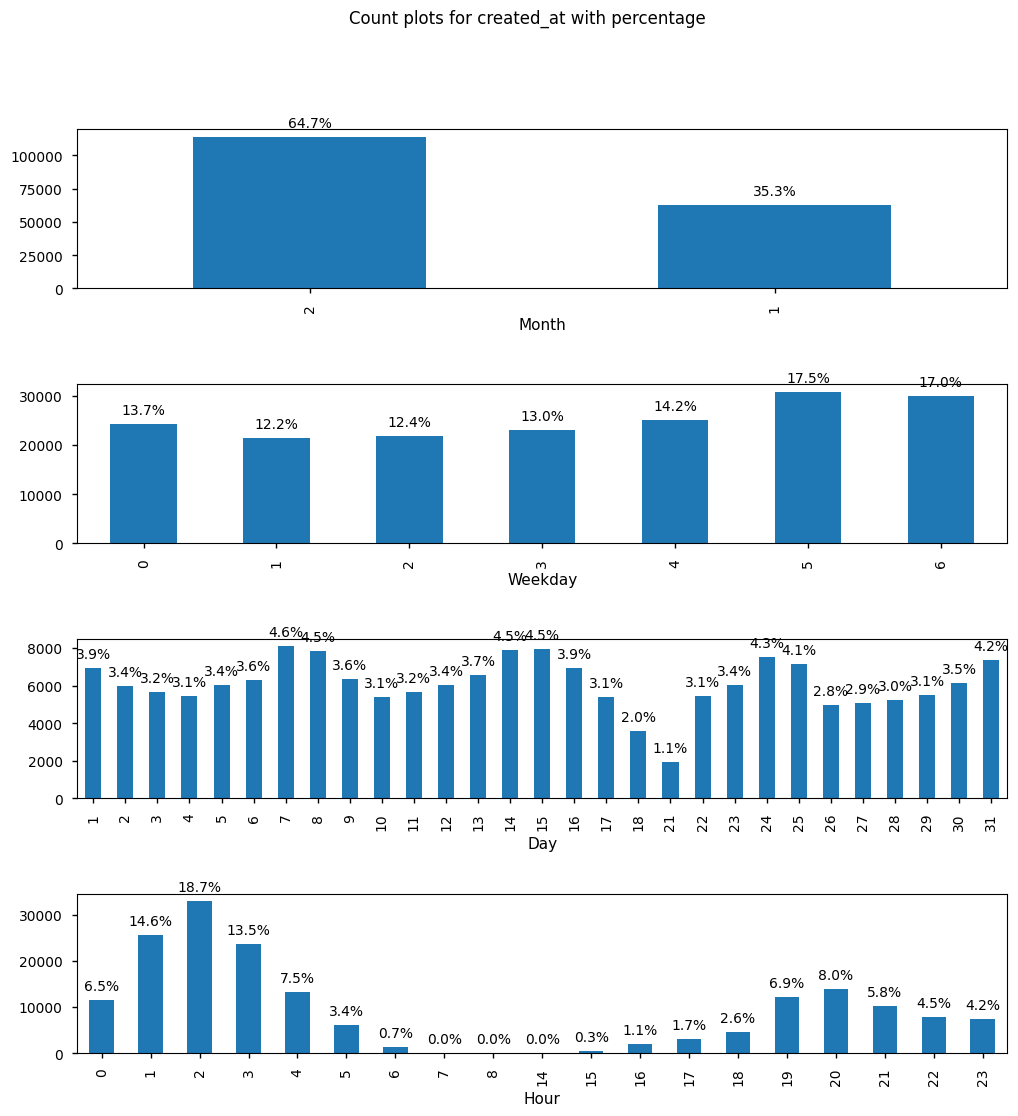

In [21]:
fig, axs = plt.subplots(4,1, figsize=(12,12))
plt.subplots_adjust(hspace=0.6)

plt.suptitle('Count plots for created_at with percentage')
axs = axs.ravel()
i = 0
for column in ['created_at']:
    ax=df[column].dropna().dt.month.value_counts().plot(kind='bar', ax=axs[i])
    ax.set_xlabel('Month')
    without_hue(ax, df[column])
    ax=df[column].dropna().dt.weekday.value_counts().sort_index().plot(kind='bar', ax=axs[i+1])
    ax.set_xlabel('Weekday')
    without_hue(ax, df[column])
    ax = df[column].dropna().dt.day.value_counts().sort_index().plot(kind='bar', ax = axs[i+2])
    ax.set_xlabel('Day')
    without_hue(ax, df[column])
    ax = df[column].dropna().dt.hour.value_counts().sort_index().plot(kind='bar', ax = axs[i+3])
    ax.set_xlabel('Hour')
    without_hue(ax, df[column])
    i = 1


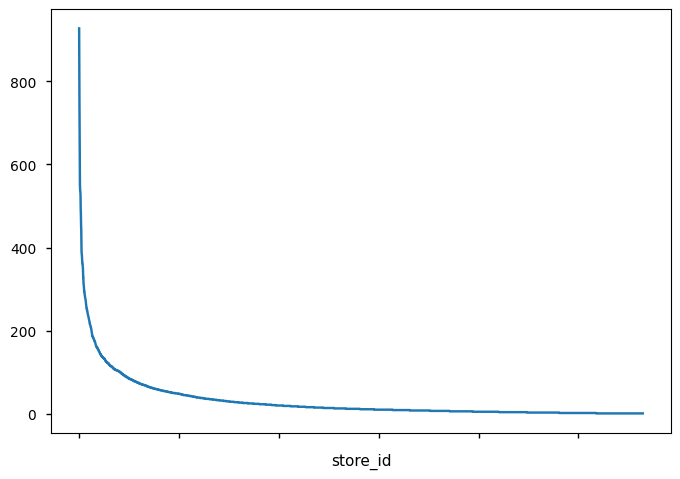

In [22]:
ax = df.store_id.value_counts().plot()
ax.set_xticklabels('')
plt.show()

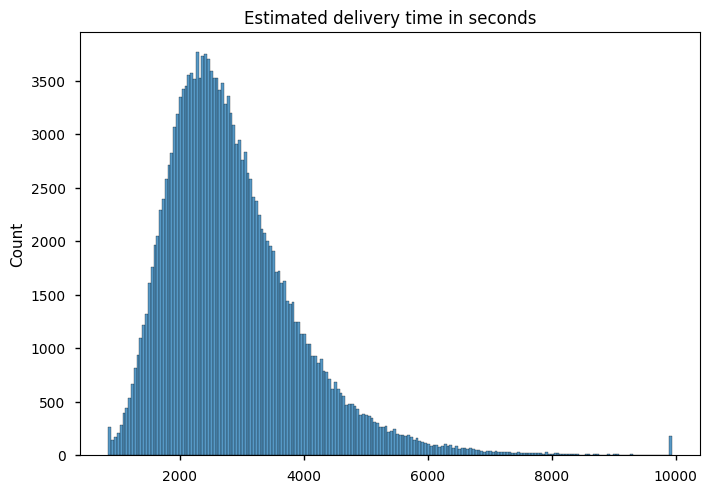

In [23]:
temp = df.dropna()
est_delivery_time = (
        (temp.actual_delivery_time - temp.created_at)
        .astype('int64')/ (10**9)
    )

sns.histplot(winsorize(est_delivery_time, limits=[0.001, 0.001]).data)
plt.title('Estimated delivery time in seconds')
plt.show()

# 3. Bivariate Analysis <a class='anchor' id='bivariate'></a> [↑](#top)

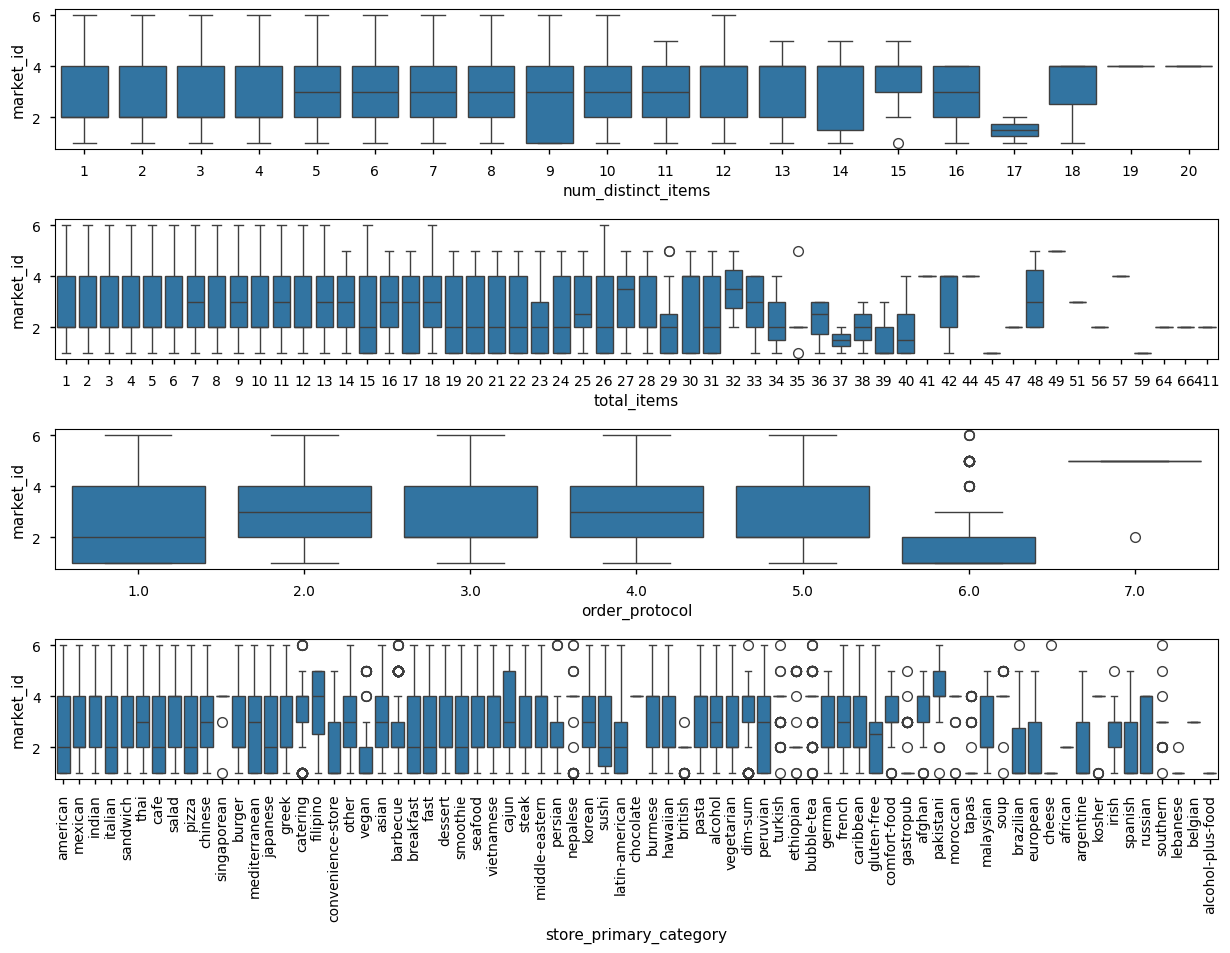

In [24]:
fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(15,10))
plt.subplots_adjust(hspace=0.5)

for col, ax in zip(cat_cols[::-1], axs.ravel()):
    sns.boxplot(df, x=col, y='market_id', ax=ax)
    plt.xticks(rotation='vertical')
plt.show()

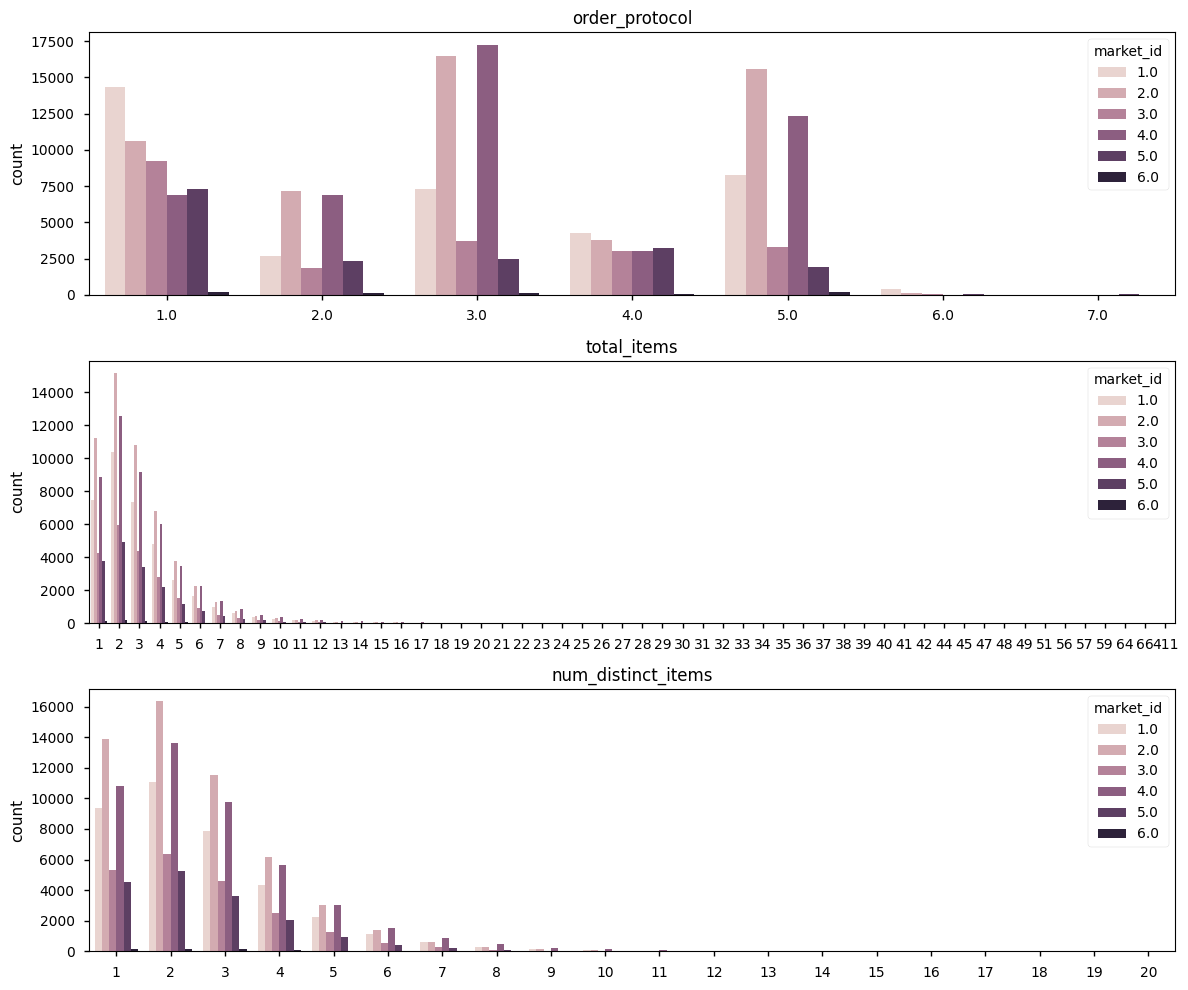

In [25]:
fig, axs = plt.subplots(nrows=len(cat_cols[1:]), ncols=1, figsize=(12,10))
plt.subplots_adjust(hspace=0.6)

for column, ax in zip(df[cat_cols[1:]], axs.ravel()):
    sns.countplot(x=df[column], ax=ax, hue=df.market_id)
    ax.set_title(column)
    ax.set_xlabel('')
    
plt.tight_layout()
plt.show()

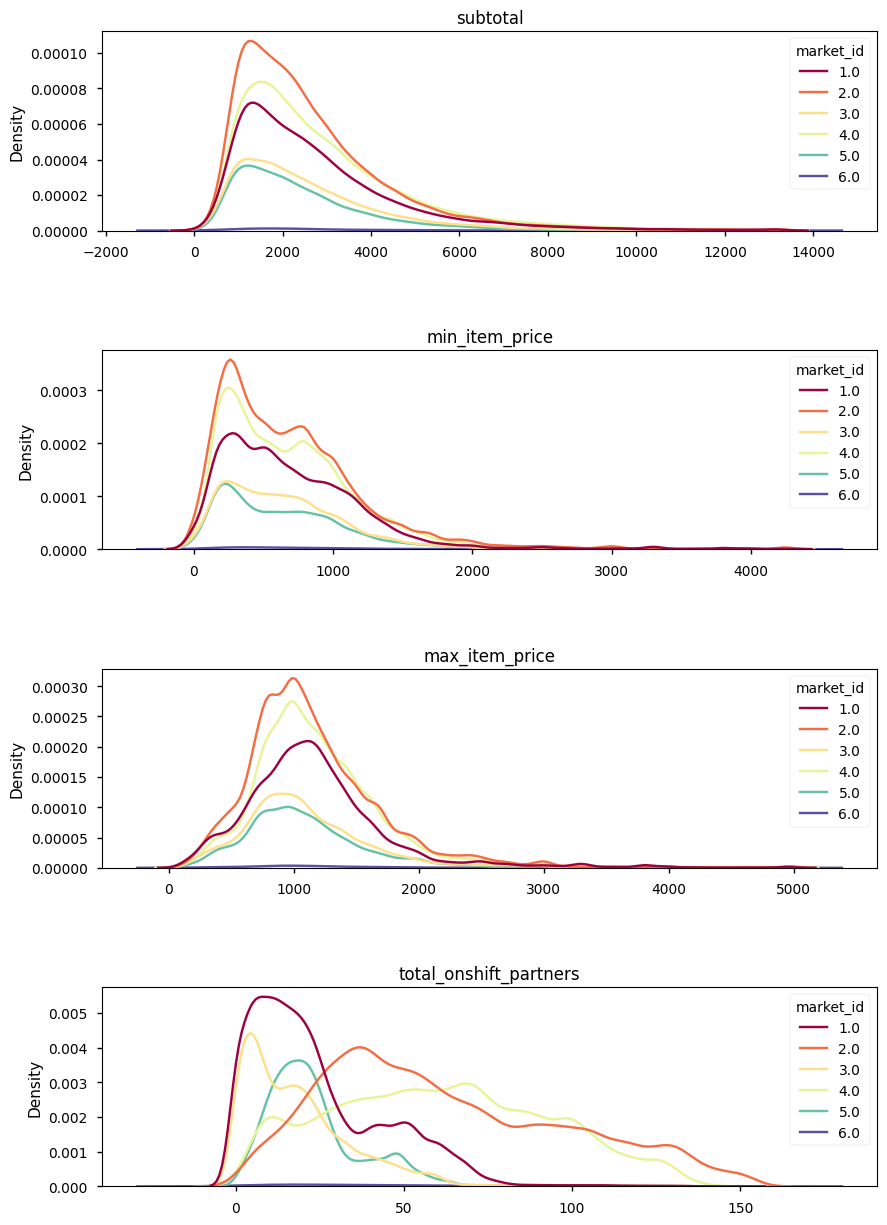

In [26]:
fig, axs = plt.subplots(nrows=len(cat_cols), ncols=1, figsize=(10,15))
plt.subplots_adjust(hspace=0.6)

for column, ax in zip(df[num_cols], axs.ravel()):
    sns.kdeplot(x=winsorize(df[column], limits=[0.001, 0.001]).data, ax=ax, hue=df.market_id, 
                palette = sns.color_palette("Spectral", as_cmap=True))
    # winsorize does capping or truncating extreme values beyond a certain percentile.
    ax.set_title(column)
    ax.set_xlabel('')

plt.show()

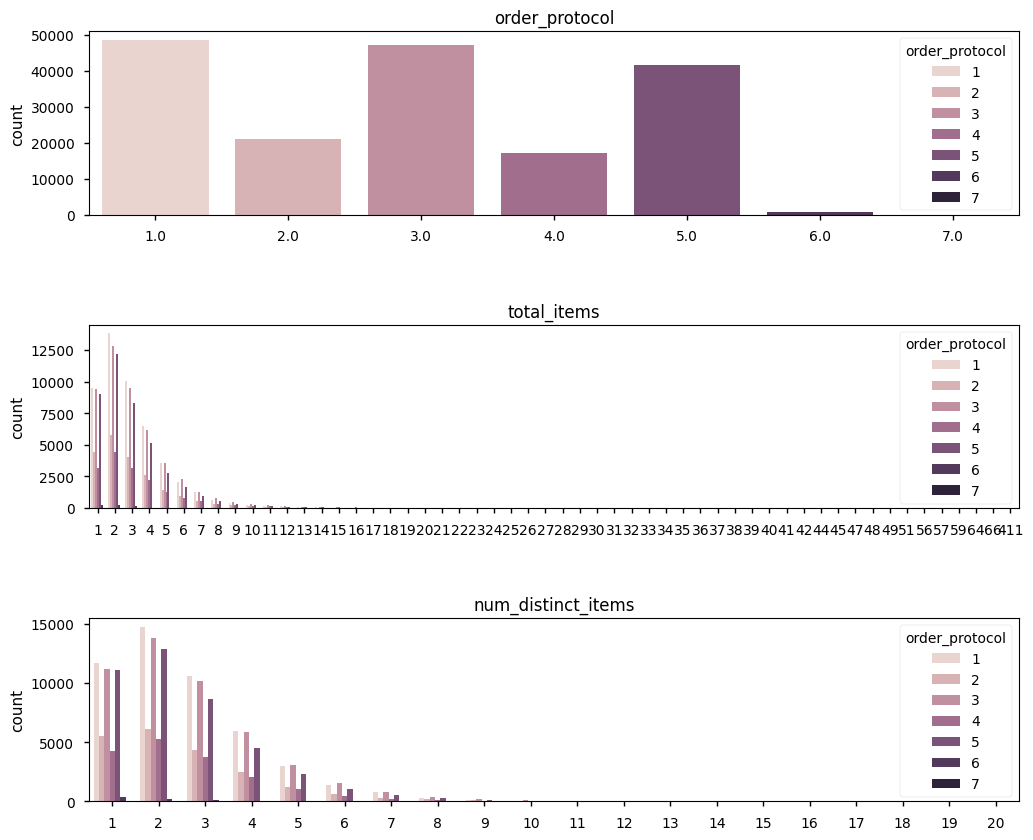

In [27]:
fig, axs = plt.subplots(nrows=len(cat_cols[1:]), ncols=1, figsize=(12,10))
plt.subplots_adjust(hspace=0.6)

for column, ax in zip(df[cat_cols[1:]], axs.ravel()):
    sns.countplot(x=df[column], ax=ax, hue=df.order_protocol)
    ax.set_title(column)
    ax.set_xlabel('')

plt.show()

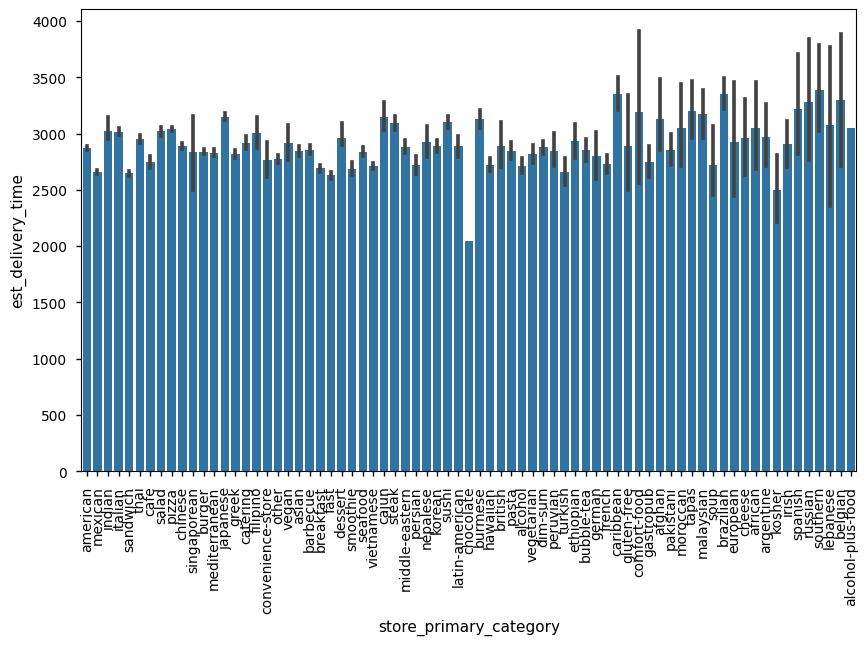

In [28]:
plt.figure(figsize=(10,6))
sns.barplot(x=df.store_primary_category, y=est_delivery_time)
plt.ylabel('est_delivery_time')
plt.xticks(rotation='vertical')
plt.show()

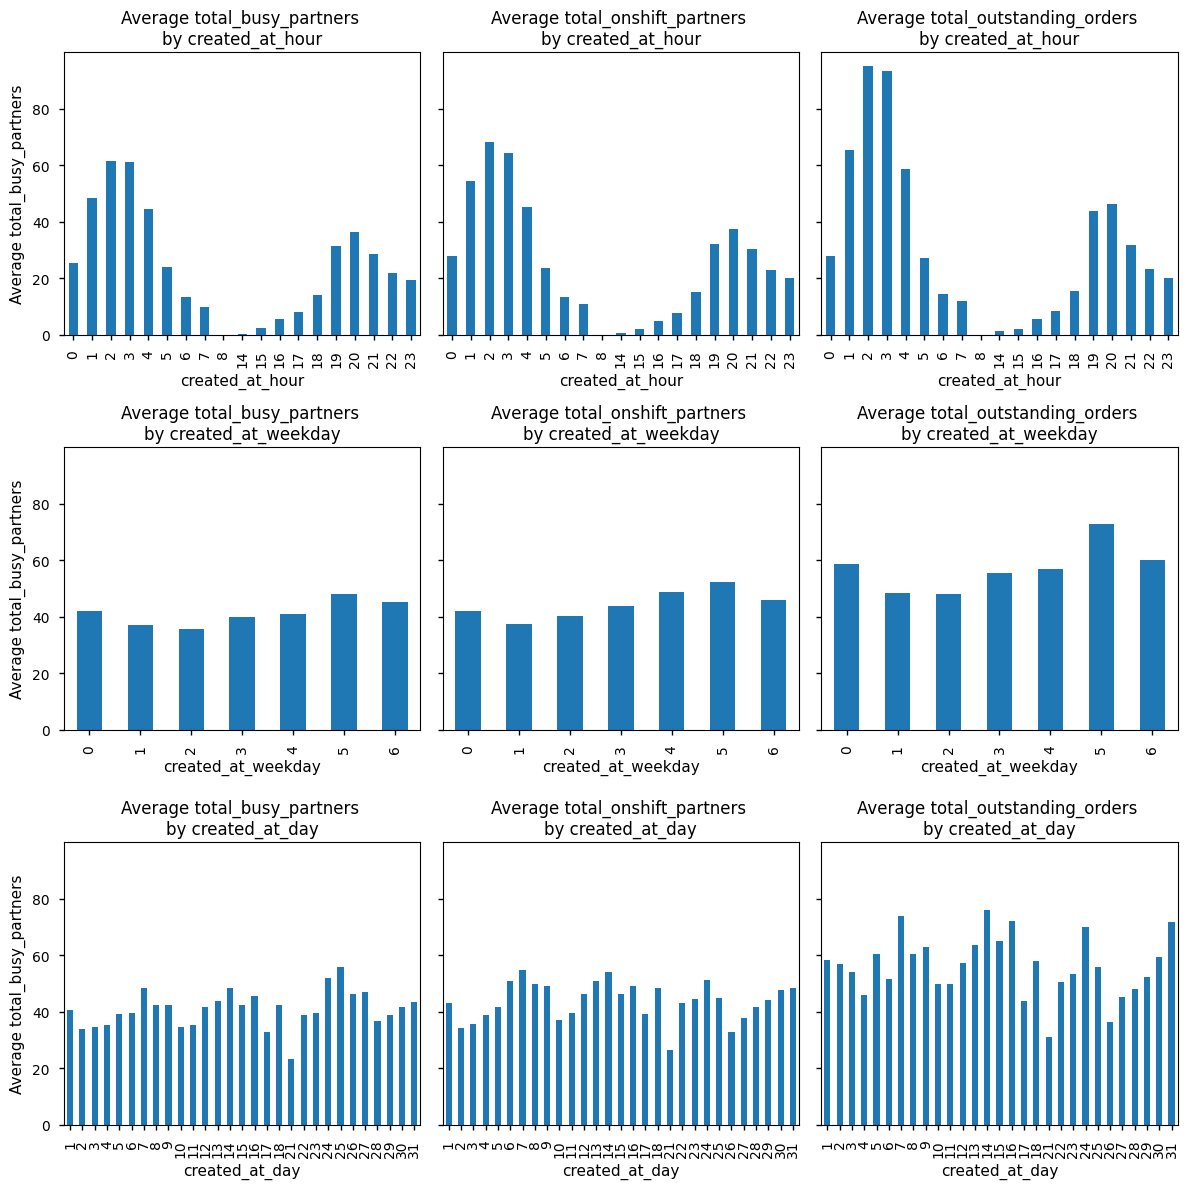

In [29]:
fig, axs = plt.subplots(3,3, figsize=(12,12), sharey=True)

axs = axs.ravel()
i = 0
for grpcol in ['created_at_hour', 'created_at_weekday', 'created_at_day']:
    for col in ['total_busy_partners', 'total_onshift_partners', 'total_outstanding_orders']:
        ax = df.groupby(grpcol)[col].mean().plot(kind='bar', ax = axs[i])
        i += 1
        ax.set_title(f'Average {col} \nby {grpcol}')
        ax.set_xlabel(f'{grpcol}')
        ax.set_ylabel(f'Average {col}')

plt.tight_layout()
plt.show()

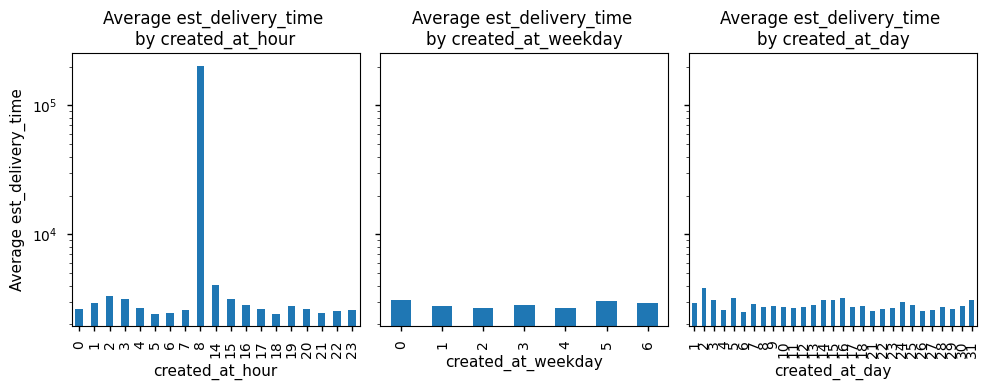

In [30]:
fig, axs = plt.subplots(1,3, figsize=(10,4), sharey=True)

axs = axs.ravel()
i = 0
for grpcol in ['created_at_hour', 'created_at_weekday', 'created_at_day']:
    for col in ['est_delivery_time']:
        ax = df.groupby(grpcol)[col].mean().plot(kind='bar', ax = axs[i])
        ax.set_yscale('log')  # Set y-axis to logarithmic scale
        i += 1
        ax.set_title(f'Average {col} \nby {grpcol}')
        ax.set_xlabel(f'{grpcol}')
        ax.set_ylabel(f'Average {col}')

plt.tight_layout()
plt.show()

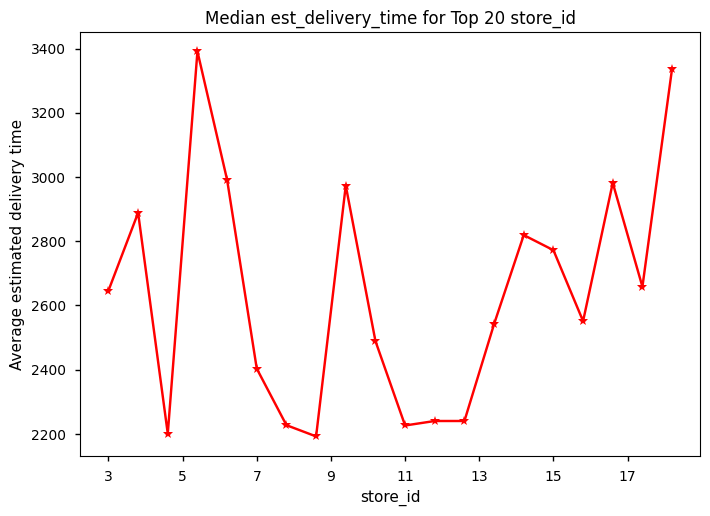

In [31]:
ax = df.groupby('store_id')['est_delivery_time'].median()[df.store_id.value_counts().head(20)].plot(marker='*',c='r')
ax.set_xticklabels(list(range(1, 21, 2)))
ax.set_title('Median est_delivery_time for Top 20 store_id')
ax.set_ylabel('Average estimated delivery time')
plt.show()

# 4. Multivariate Analysis <a class='anchor' id='multivariate'></a> [↑](#top)

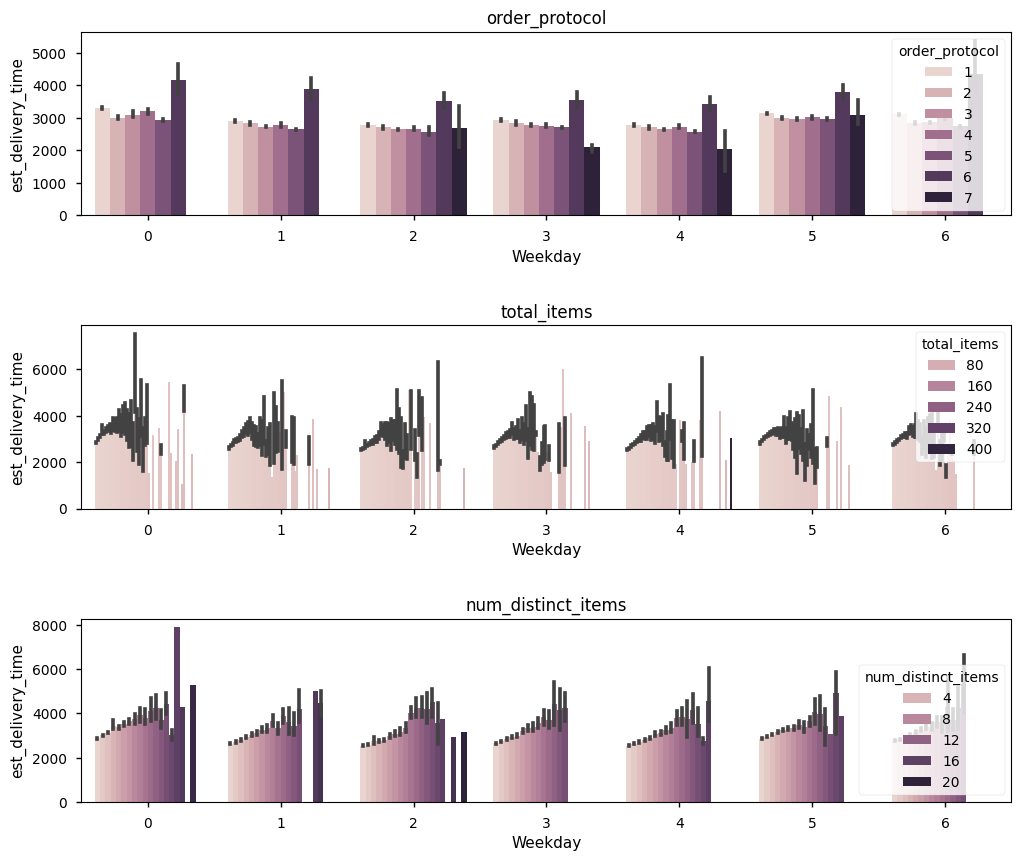

In [32]:
fig, axs = plt.subplots(nrows=len(cat_cols[1:]), ncols=1, figsize=(12,10))
plt.subplots_adjust(hspace=0.6)

for column, ax in zip(df[cat_cols[1:]], axs.ravel()):
    sns.barplot(x=df.created_at.dt.weekday, y=est_delivery_time, ax=ax, hue=df[column])
    ax.set_title(column)
    ax.set_xlabel('')
    ax.set_xlabel('Weekday')
    ax.set_ylabel('est_delivery_time')
plt.show()

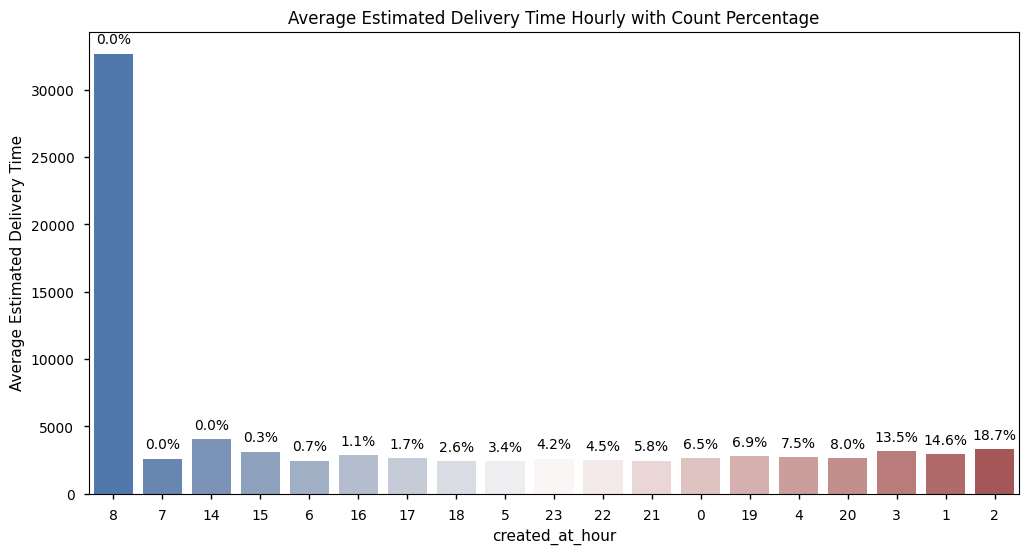

In [33]:
temp = pd.DataFrame({'created_at_hour':df.created_at.dt.hour, 'est_delivery_time':est_delivery_time})
temp = temp[temp.est_delivery_time < 60000].dropna()
temp1 = temp.groupby('created_at_hour')['est_delivery_time'].mean()

plt.figure(figsize=(12,6))
# Count of deliveries for each hour
delivery_count = temp['created_at_hour'].value_counts().sort_index()
delivery_count = delivery_count*100/sum(delivery_count)
delivery_count = delivery_count.sort_values()
ax = sns.barplot(x=temp1.index, y=temp1.values, palette='vlag', order=temp1[delivery_count.sort_values().index].index)

# Annotate bars with custom values
for i, p in enumerate(ax.patches):
    ax.annotate(f'{delivery_count.iloc[i]:.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10, color='black')

ax.set_ylabel('Average Estimated Delivery Time')
plt.title('Average Estimated Delivery Time Hourly with Count Percentage')
plt.show()

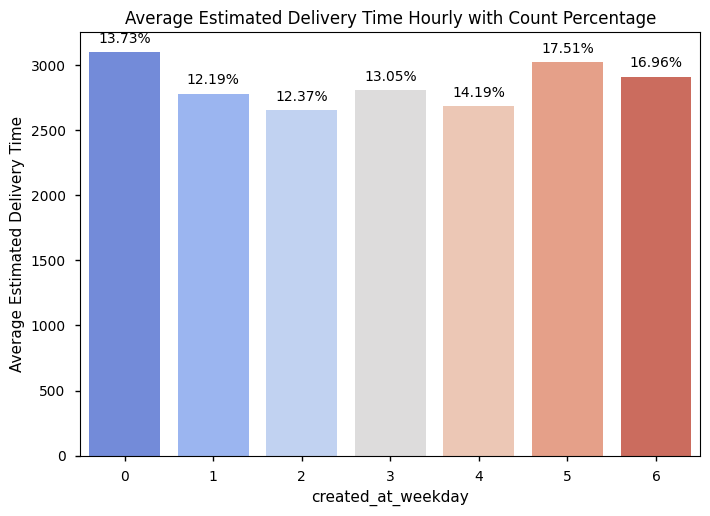

In [34]:
temp = pd.DataFrame({'created_at_weekday':df.created_at.dt.weekday, 'est_delivery_time':est_delivery_time})
temp = temp[temp.est_delivery_time < 60000].dropna()
temp1 = temp.groupby('created_at_weekday')['est_delivery_time'].mean()

plt.figure(figsize=(8,5.5))
ax = sns.barplot(x=temp1.index, y=temp1.values, palette=sns.color_palette("coolwarm", n_colors=len(temp1)))

# Count of deliveries for each hour
delivery_count = temp['created_at_weekday'].value_counts().sort_index()
delivery_count = delivery_count*100/sum(delivery_count)

# Annotate bars with custom values
for i, p in enumerate(ax.patches):
    ax.annotate(f'{delivery_count.iloc[i]:.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10, color='black')

ax.set_ylabel('Average Estimated Delivery Time')
plt.title('Average Estimated Delivery Time Hourly with Count Percentage')
plt.show()

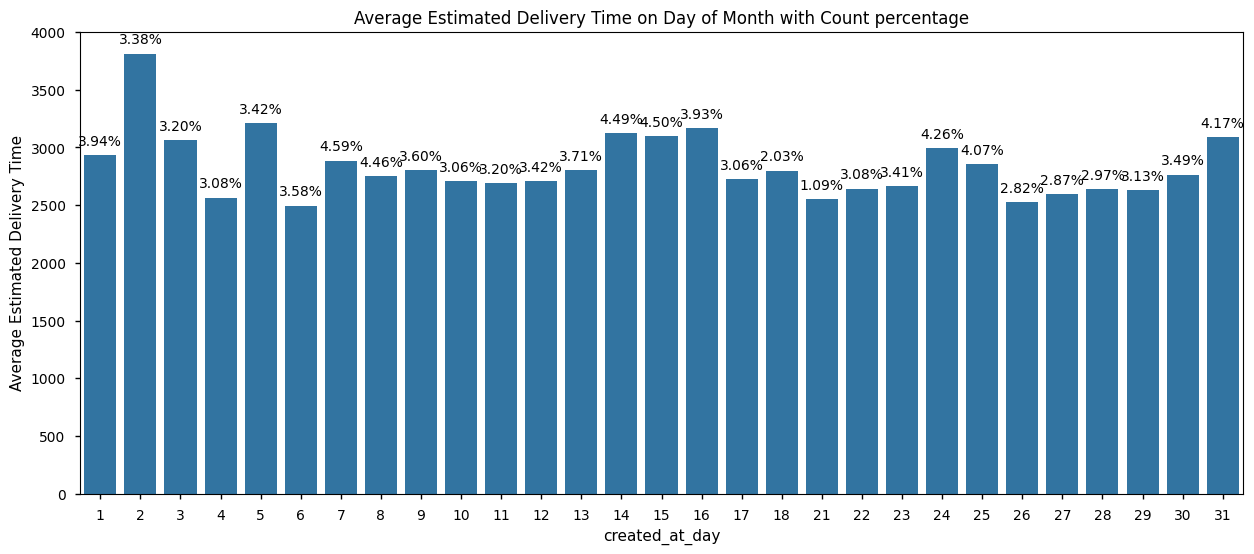

In [35]:
temp = pd.DataFrame({'created_at_day':df.created_at.dt.day, 'est_delivery_time':est_delivery_time})
temp = temp[temp.est_delivery_time < 60000].dropna()
temp1 = temp.groupby('created_at_day')['est_delivery_time'].mean()

plt.figure(figsize=(15,6))
ax = sns.barplot(x=temp1.index, y=temp1.values)

# Count of deliveries for each hour
delivery_count = temp['created_at_day'].value_counts().sort_index()
delivery_count = delivery_count*100/sum(delivery_count)
# Annotate bars with custom values
for i, p in enumerate(ax.patches):
    ax.annotate(f'{delivery_count.iloc[i]:.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10, color='black')

ax.set_ylabel('Average Estimated Delivery Time')
plt.title('Average Estimated Delivery Time on Day of Month with Count percentage')
plt.show()

In [36]:
# sns.pairplot(df, y_vars='est_delivery_time' )

Text(0.5, 1.0, 'Percentage Distribution of Average Delivery Time by Hour and Weekday')

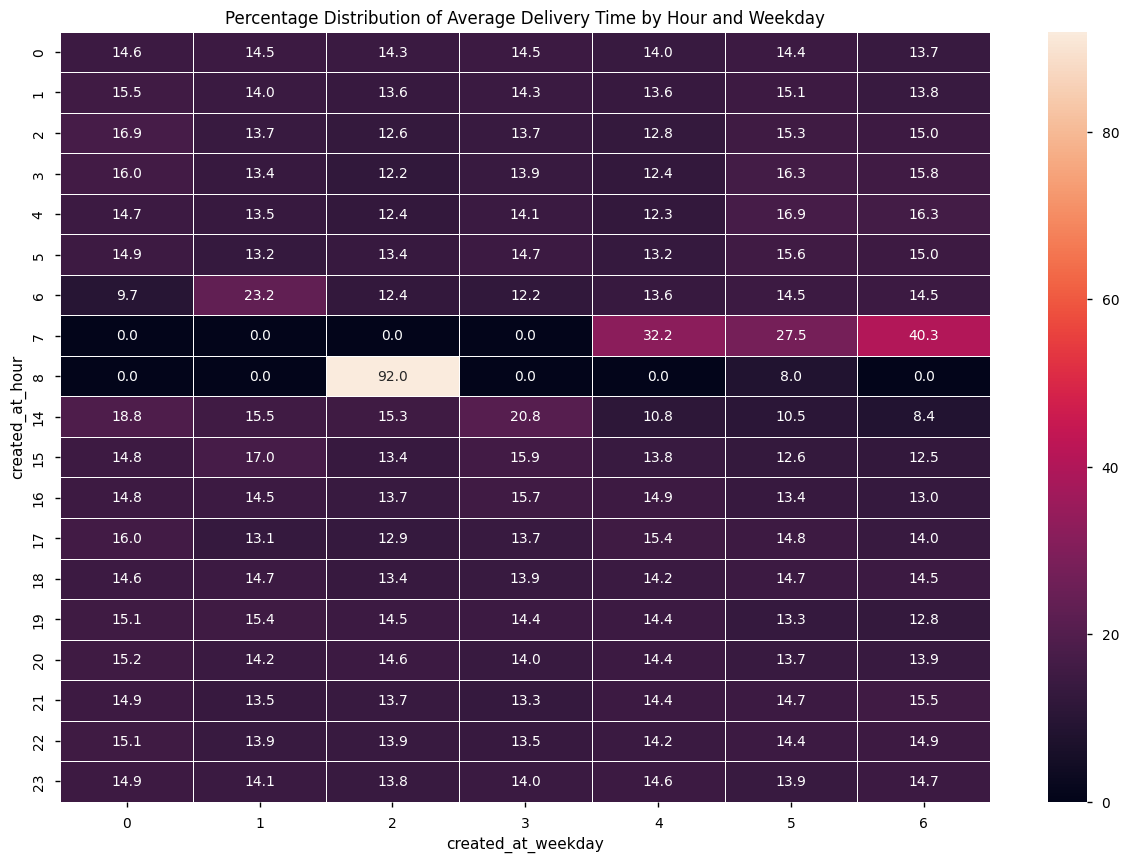

In [37]:
temp = df.groupby(['created_at_hour', 'created_at_weekday'])['est_delivery_time'].mean().unstack().fillna(0)

temp = temp.div(temp.sum(axis=1), axis=0) * 100

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(temp, annot=True, fmt=".1f", linewidths=.5, ax=ax)
ax.set_title('Percentage Distribution of Average Delivery Time by Hour and Weekday')

Text(0.5, 1.0, 'Percentage Distribution of Average Delivery Time by Hour and Weekday')

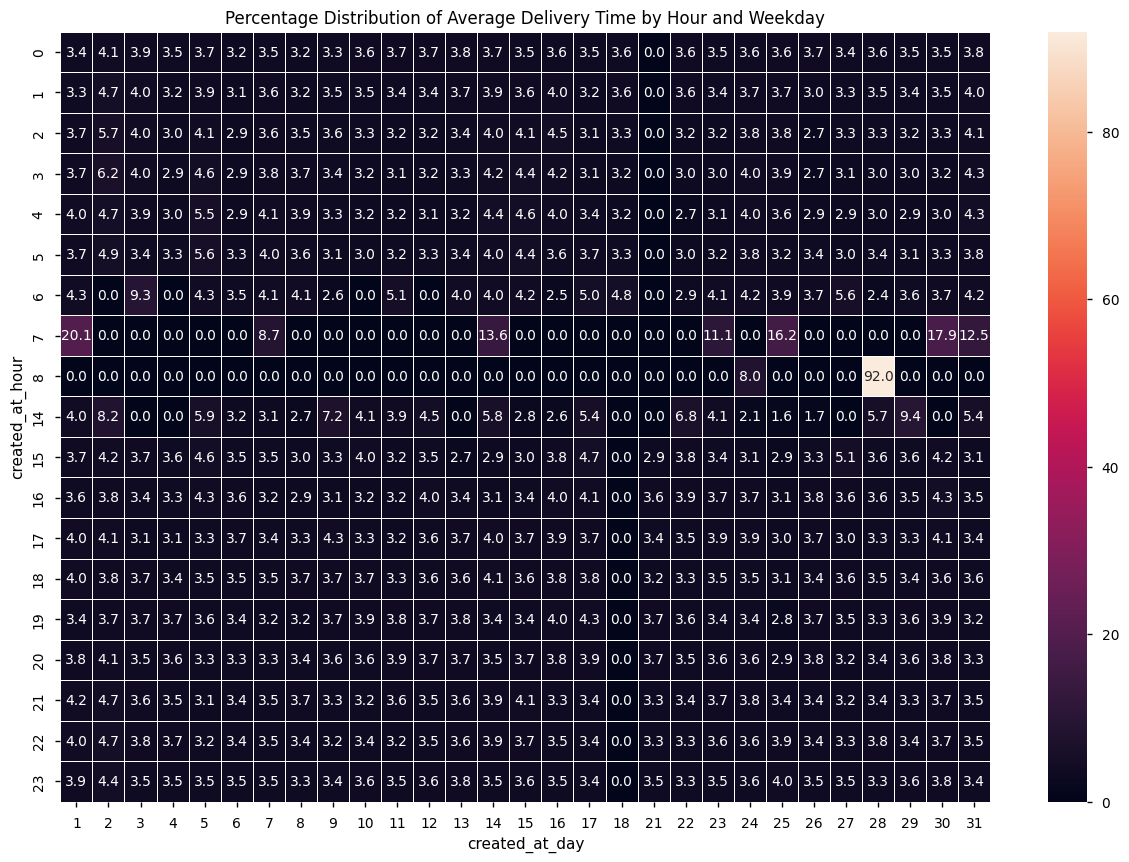

In [38]:
temp = df.groupby(['created_at_hour', 'created_at_day'])['est_delivery_time'].mean().unstack().fillna(0)

temp = temp.div(temp.sum(axis=1), axis=0) * 100

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(temp, annot=True, fmt=".1f", linewidths=.5, ax=ax)
ax.set_title('Percentage Distribution of Average Delivery Time by Hour and Weekday')

* Average est_delivery_time is high for around hours 6, 7 and 14 almost for all days.

<Axes: >

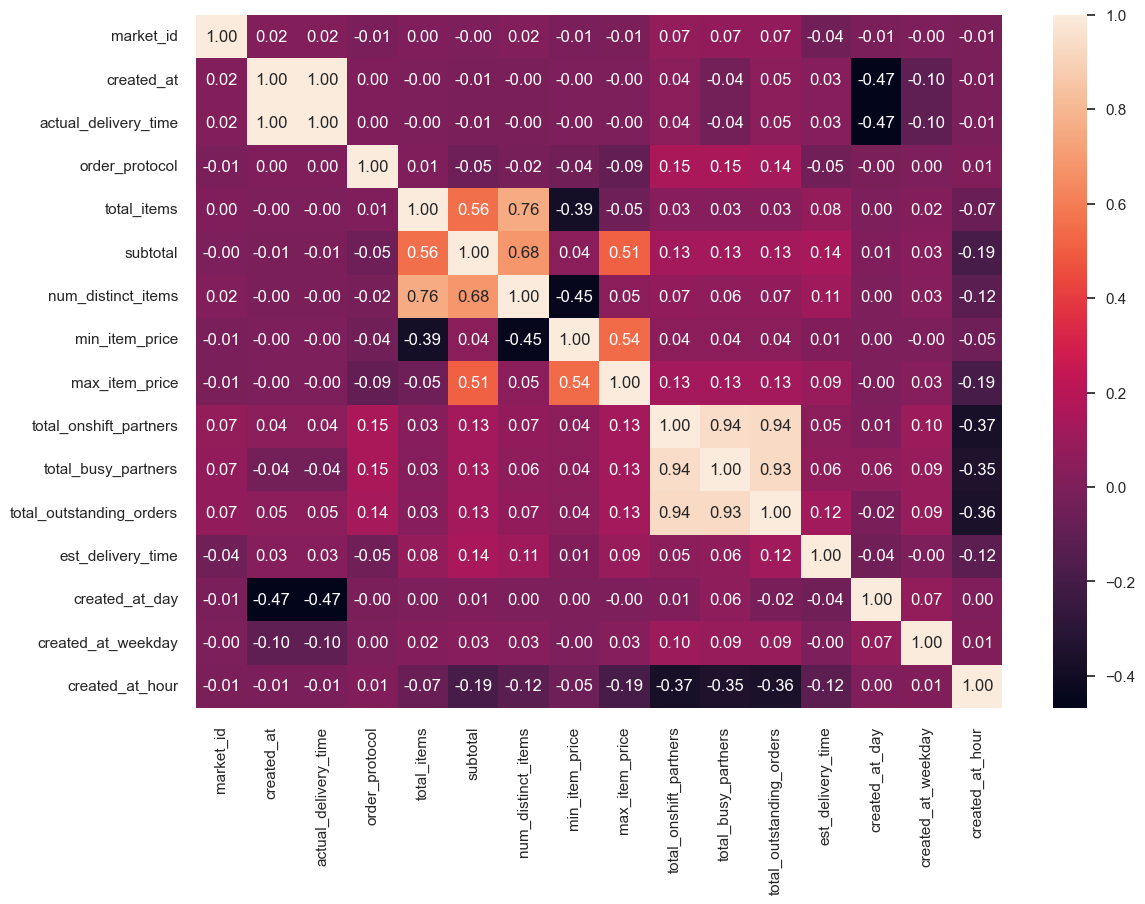

In [39]:
sns.set(rc={'figure.figsize':(13,9)})
sns.heatmap(df.select_dtypes(exclude='object').corr(), annot=True, fmt=".2f")

---

# 3. Data Preprocessing and Feature Engineering <a class='anchor' id='feature_eng' ></a> [↑](#top)

In [40]:
df['created_at_period'] = pd.cut(df['created_at'].dt.hour, 
                                 bins=[0, 6, 12, 18, 24], 
                                 labels=['Night', 'Morning', 'Afternoon', 'Evening'], 
                                 include_lowest=True)

In [41]:
df = df.drop(['created_at', 'actual_delivery_time'], axis=1)

In [42]:
df.isnull().sum()

market_id                   0
store_id                    0
store_primary_category      0
order_protocol              0
total_items                 0
subtotal                    0
num_distinct_items          0
min_item_price              0
max_item_price              0
total_onshift_partners      0
total_busy_partners         0
total_outstanding_orders    0
est_delivery_time           0
created_at_day              0
created_at_weekday          0
created_at_hour             0
created_at_period           0
dtype: int64

In [43]:
df.duplicated().sum()

0

<Axes: xlabel='created_at_period'>

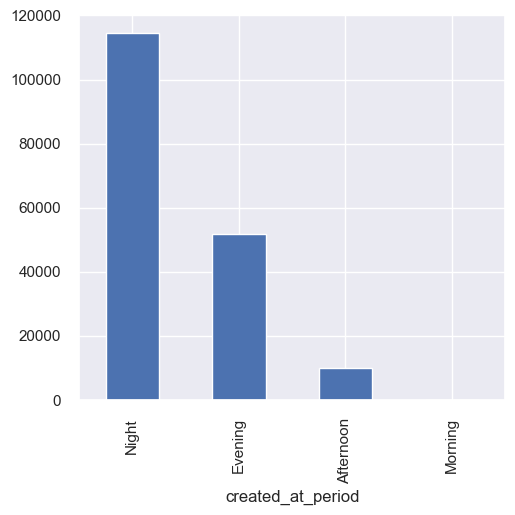

In [44]:
plt.figure(figsize=(5.5,5))
df.created_at_period.value_counts().plot(kind='bar')

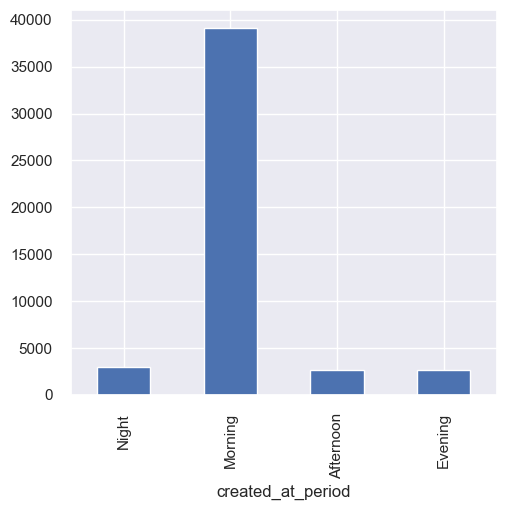

In [45]:
plt.figure(figsize=(5.5,5))
ax = df.groupby('created_at_period')['est_delivery_time'].mean().plot(kind='bar')


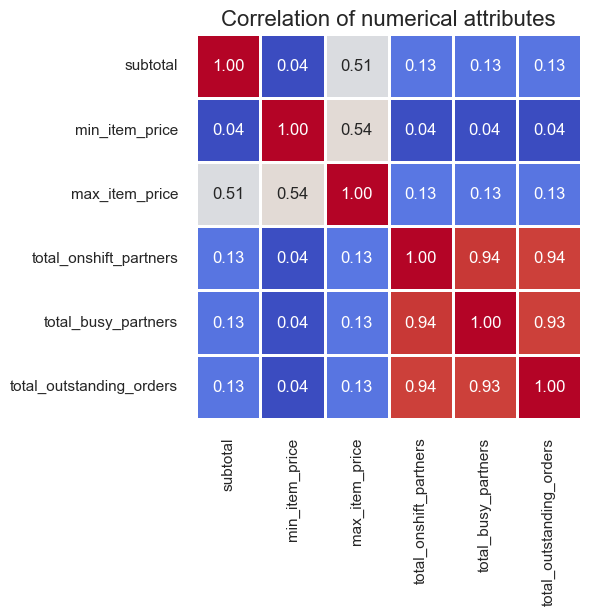

In [46]:
plt.figure(figsize=(5,5))
correlation = df[num_cols].corr()
sns.heatmap(correlation, linewidth=1, cmap='coolwarm', annot=True, fmt='.2f', cbar=False, square=True)
plt.title("Correlation of numerical attributes", size=16)
plt.show()

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 176248 entries, 0 to 197427
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   market_id                 176248 non-null  float64 
 1   store_id                  176248 non-null  object  
 2   store_primary_category    176248 non-null  object  
 3   order_protocol            176248 non-null  float64 
 4   total_items               176248 non-null  int64   
 5   subtotal                  176248 non-null  int64   
 6   num_distinct_items        176248 non-null  int64   
 7   min_item_price            176248 non-null  int64   
 8   max_item_price            176248 non-null  int64   
 9   total_onshift_partners    176248 non-null  float64 
 10  total_busy_partners       176248 non-null  float64 
 11  total_outstanding_orders  176248 non-null  float64 
 12  est_delivery_time         176248 non-null  float64 
 13  created_at_day            176248 n

In [48]:
df_ = df.sample(frac=1)

In [49]:
from sklearn.model_selection import train_test_split

## Splitting data into train, 
X, X_test, y, y_test = train_test_split(df_.drop('est_delivery_time', axis=1), df_.est_delivery_time, test_size=0.2, random_state=0)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

In [50]:
from category_encoders.ordinal import OrdinalEncoder
from category_encoders.target_encoder import TargetEncoder
from category_encoders.m_estimate import MEstimateEncoder
from category_encoders.leave_one_out import LeaveOneOutEncoder
from category_encoders.cat_boost import CatBoostEncoder
from category_encoders.james_stein import JamesSteinEncoder
from category_encoders.one_hot import OneHotEncoder

In [51]:
import gc
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

encoder_list = [ OrdinalEncoder(), TargetEncoder(), MEstimateEncoder(), 
                JamesSteinEncoder(), LeaveOneOutEncoder() ,CatBoostEncoder()]

column_width = 20
print(f"|{'Encoder':<{column_width}}|{'MSE':<{column_width}}|")
print(f"|{'-' * column_width}|{'-' * column_width}|")
for encoder in encoder_list:
    
    train_enc = encoder.fit_transform(X_train.select_dtypes(include=['object', 'category']), y_train)
    val_enc = encoder.transform(X_val.select_dtypes(include=['object', 'category']))
    # test_enc = encoder.transform(X_test.select_dtypes(include='object'))

    train_enc = pd.concat([train_enc, X_train.select_dtypes(exclude=['object', 'category'])], axis=1)
    val_enc = pd.concat([val_enc, X_val.select_dtypes(exclude=['object', 'category'])], axis=1)
    # test_enc = pd.concat([test_enc, X_test.select_dtypes(exclude='object')], axis=1)
    
    lr = LinearRegression()
    lr.fit(train_enc, y_train)

    lr_pred = lr.predict(val_enc)
    # lr_pred_test = lr.predict(test_enc)

    score = mean_squared_error(y_val, lr_pred)
    # print(f"Test {str(encoder).split('(')[0]:>20} : ", end=" ")
    # print("MSE: ", score)
    encoder_name = str(encoder).split('(')[0]
    
    print(f"|{encoder_name:<{column_width}}|{score:<{column_width}}|")
    # print("RMSE: ", r2_score(y_val, lr_pred))
    del train_enc
    del val_enc
    gc.collect()

|Encoder             |MSE                 |
|--------------------|--------------------|
|OrdinalEncoder      |1184501.0151853592  |
|TargetEncoder       |1150293.676608654   |
|MEstimateEncoder    |1141614.8190791751  |
|JamesSteinEncoder   |1163669.0553218252  |
|LeaveOneOutEncoder  |1120156.3206631704  |
|CatBoostEncoder     |1119545.938999873   |


In [52]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import FunctionTransformer

In [53]:
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from typing import Optional, List, Union

class MultiColumnLabelEncoder(BaseEstimator, TransformerMixin):
    def __init__(self) -> None:
        self.categories_: dict[str, Union[None, List[str]]] = {}

    def fit(self, X: pd.DataFrame, y: Optional[pd.Series] = None) -> 'MultiColumnLabelEncoder':
        self.label_encoders: dict[str, LabelEncoder] = {}
        for col in X.columns:
            le = LabelEncoder()
            le.fit(X[col])
            self.label_encoders[col] = le
            self.categories_[col] = le.classes_
        return self

    def transform(self, X: pd.DataFrame) -> pd.DataFrame:
        X_transformed = X.copy()
        for col, le in self.label_encoders.items():
            X_transformed[col] = le.transform(X[col])
        return pd.DataFrame(X_transformed, columns=X_transformed.columns)
        # return X_transformed
    
    def get_feature_names_out(self, input_features: Optional[List[str]] = None) -> List[str]:
        return [f"{col}__{category}" for col in input_features for category in self.categories_[col]]
    
    def inverse_transform(self, X: pd.DataFrame) -> pd.DataFrame:
        X_inverse = X.copy()
        for col, le in self.label_encoders.items():
            X_inverse[col] = le.inverse_transform(X[col])
        return X_inverse

In [54]:
# col_transformer = ColumnTransformer(
#                     transformers=[
#                         ('a', MultiColumnLabelEncoder(), df.select_dtypes(exclude=[int, float]).columns)
#                         ], 
#                             remainder='passthrough')

# col_transformer.fit(df)
# result = col_transformer.transform(df)
# print(result)

In [55]:
# col_transformer.named_transformers_['a'].categories_

In [56]:
# col_transformer.named_transformers_['a'].inverse_transform(result)

In [57]:
# df[df.select_dtypes(include=['object', 'category']).columns] = df[
#                                                         df
#                                                           .select_dtypes(include=['object', 'category'])
#                                                           .columns]\
#                                                         .apply(LabelEncoder().fit_transform)

In [58]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140998 entries, 17482 to 103073
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   market_id                 140998 non-null  float64 
 1   store_id                  140998 non-null  object  
 2   store_primary_category    140998 non-null  object  
 3   order_protocol            140998 non-null  float64 
 4   total_items               140998 non-null  int64   
 5   subtotal                  140998 non-null  int64   
 6   num_distinct_items        140998 non-null  int64   
 7   min_item_price            140998 non-null  int64   
 8   max_item_price            140998 non-null  int64   
 9   total_onshift_partners    140998 non-null  float64 
 10  total_busy_partners       140998 non-null  float64 
 11  total_outstanding_orders  140998 non-null  float64 
 12  created_at_day            140998 non-null  int32   
 13  created_at_weekday        1409

In [59]:
NUM_FEATURES = X_train.select_dtypes(exclude=['object', 'category']).columns
OBJ_FEATURES = X_train.select_dtypes(include=['object']).columns
CAT_FEATURES = X_train.select_dtypes(include=['category']).columns

num_pipe = Pipeline(steps=[
    ('num_imputer', SimpleImputer(strategy='mean')),
    # ('scale', StandardScaler()),   
])
obj_pipe = Pipeline(steps=[
    ('cat_imputer', SimpleImputer(strategy='most_frequent')) ,  
    ('encode', OrdinalEncoder()),   
    # ('scale', StandardScaler(with_mean=False)),
])

cat_pipe = Pipeline(steps=[
    ('cat_imputer', SimpleImputer(strategy='most_frequent')) ,  
    ('encode', OrdinalEncoder()),   
    # ('scale', StandardScaler(with_mean=False)),
])

preprocessor = ColumnTransformer(transformers=[
    ('num', num_pipe, NUM_FEATURES),
    ('obj', obj_pipe, OBJ_FEATURES),
    ('cat', cat_pipe, CAT_FEATURES)
], remainder='drop')


In [60]:
encoded_df = preprocessor.set_output(transform='pandas').fit_transform(X)

In [61]:
encoded_df = encoded_df.join(y)

In [62]:
encoded_df.est_delivery_time = encoded_df.est_delivery_time/60

In [63]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest


outlier_removal = LocalOutlierFactor(n_neighbors=10)
encoded_df['lof_anomaly_score'] = outlier_removal.fit_predict(encoded_df)
print("number of outliers : ",(len(encoded_df[encoded_df['lof_anomaly_score'] == -1]), (encoded_df['lof_anomaly_score'] == -1).sum()))


number of outliers :  (1119, 1119)


In [64]:
encoded_df

,num__market_id,num__order_protocol,num__total_items,num__subtotal,num__num_distinct_items,num__min_item_price,num__max_item_price,num__total_onshift_partners,num__total_busy_partners,num__total_outstanding_orders,num__created_at_day,num__created_at_weekday,num__created_at_hour,obj__store_id,obj__store_primary_category,cat__created_at_period,est_delivery_time,lof_anomaly_score
17482,2.0,1.0,2.0,2060.0,2.0,865.0,1195.0,23.0,24.0,35.0,8.0,6.0,4.0,1,1,1,73.866667,1
80758,3.0,5.0,2.0,2620.0,2.0,1150.0,1395.0,49.0,42.0,41.0,23.0,4.0,1.0,2,2,1,30.350000,1
66115,2.0,5.0,1.0,1428.0,1.0,1008.0,1168.0,76.0,69.0,86.0,23.0,4.0,4.0,3,3,1,35.933333,1
85239,2.0,3.0,3.0,1825.0,3.0,110.0,750.0,54.0,61.0,95.0,24.0,5.0,20.0,4,4,2,35.266667,1
166116,3.0,4.0,3.0,1528.0,3.0,0.0,1049.0,12.0,9.0,9.0,5.0,3.0,0.0,5,5,1,49.050000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114778,3.0,1.0,1.0,1100.0,1.0,1100.0,1100.0,21.0,16.0,14.0,13.0,4.0,5.0,2029,11,1,50.466667,1
177899,4.0,3.0,6.0,6400.0,3.0,400.0,1500.0,65.0,65.0,90.0,11.0,2.0,1.0,1792,27,1,39.983333,1
107361,1.0,1.0,3.0,5425.0,3.0,875.0,3300.0,0.0,0.0,0.0,4.0,2.0,20.0,2293,25,2,74.533333,1
27927,2.0,2.0,3.0,1183.0,3.0,199.0,550.0,26.0,24.0,25.0,12.0,3.0,21.0,540,4,2,25.100000,1


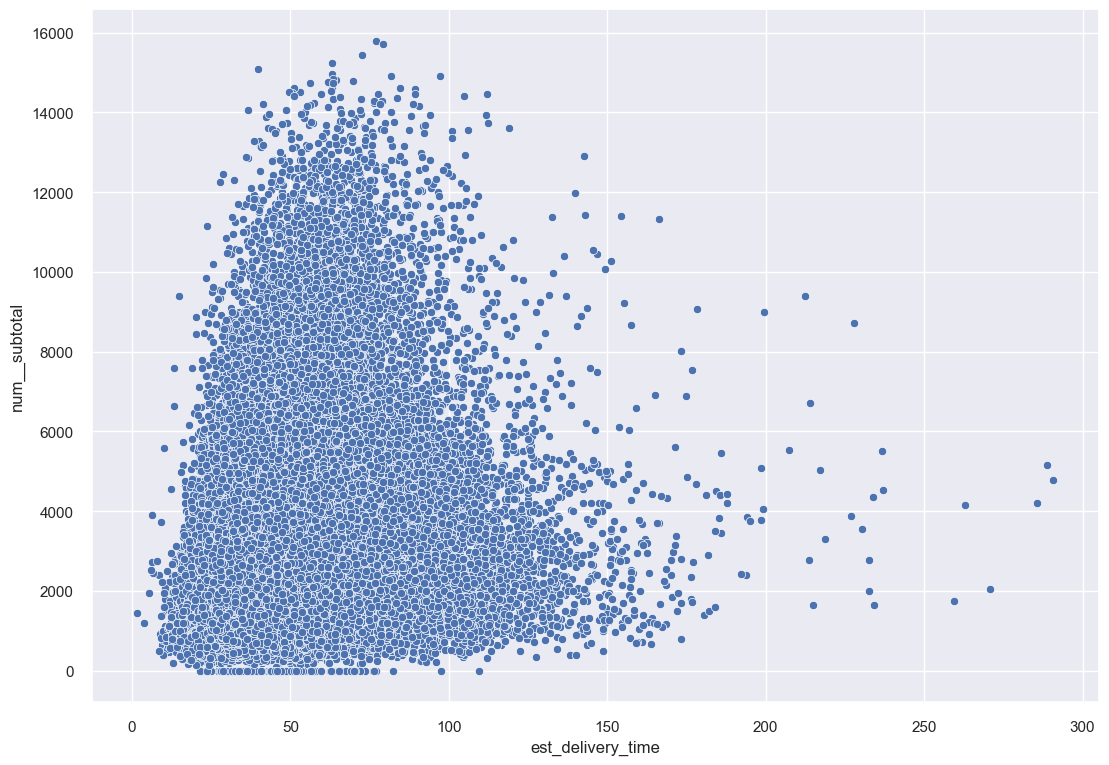

In [65]:
df_ = encoded_df[encoded_df['lof_anomaly_score'] == 1].copy()

sns.scatterplot(x='est_delivery_time', y='num__subtotal', data=df_[df_['lof_anomaly_score'] == 1])

# drop anomaly column
df_.drop(['lof_anomaly_score'],axis=1,inplace=True)

In [66]:
iclf = IsolationForest()
test2 = iclf.fit_predict(df_)

In [67]:
np.unique(test2, return_counts=True)

(array([-1,  1]), array([ 25571, 114308], dtype=int64))

<Axes: xlabel='est_delivery_time', ylabel='Density'>

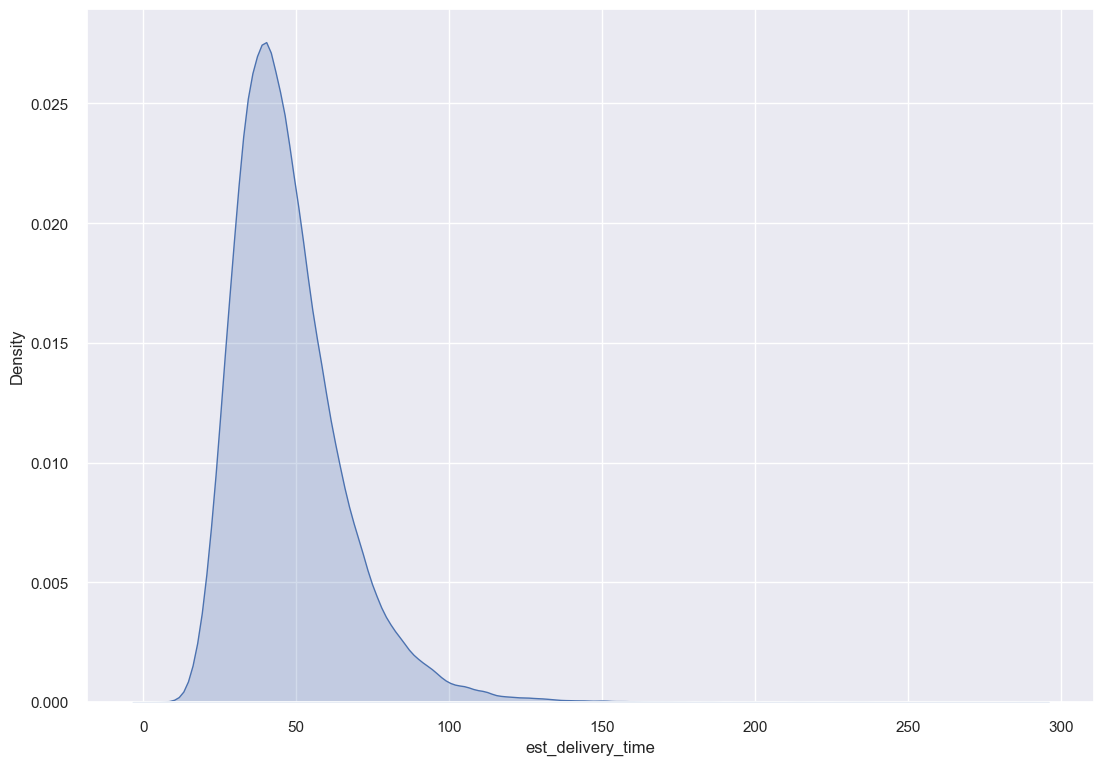

In [68]:
sns.kdeplot(df_, x='est_delivery_time', fill=True)

In [69]:
df_.shape

(139879, 17)

In [70]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
Index: 139879 entries, 17482 to 103073
Data columns (total 17 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   num__market_id                 139879 non-null  float64
 1   num__order_protocol            139879 non-null  float64
 2   num__total_items               139879 non-null  float64
 3   num__subtotal                  139879 non-null  float64
 4   num__num_distinct_items        139879 non-null  float64
 5   num__min_item_price            139879 non-null  float64
 6   num__max_item_price            139879 non-null  float64
 7   num__total_onshift_partners    139879 non-null  float64
 8   num__total_busy_partners       139879 non-null  float64
 9   num__total_outstanding_orders  139879 non-null  float64
 10  num__created_at_day            139879 non-null  float64
 11  num__created_at_weekday        139879 non-null  float64
 12  num__created_at_hour           

In [71]:
# df_ = df_.drop('created_at_hour', axis=1)

In [86]:
X, X_test, y, y_test = train_test_split(df_.drop('est_delivery_time', axis=1), df_.est_delivery_time, test_size=0.2, random_state=0)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

In [73]:
from sklearn.ensemble import RandomForestRegressor

In [74]:
rf_pipeline = Pipeline(steps=[       
        ('regress', RandomForestRegressor())
    ])

In [75]:
rf_pipeline.fit(X, y)

Pipeline(steps=[('regress', RandomForestRegressor())])

In [76]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

# Prediction
prediction = rf_pipeline.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, prediction)
rmse = mse**.5
print("mse : ", mse)
print("rmse : ",rmse)

mae = mean_absolute_error(y_test, prediction)
print('mae:' ,mae)

r2_score = r2_score(y_test, prediction)
print('r_squared:' ,r2_score)

mse :  230.32073102729584
rmse :  15.176321393120793
mae: 11.197936634731697
r_squared: 0.29650441749579814


Text(0.5, 0, 'Random Forest Feature Importance')

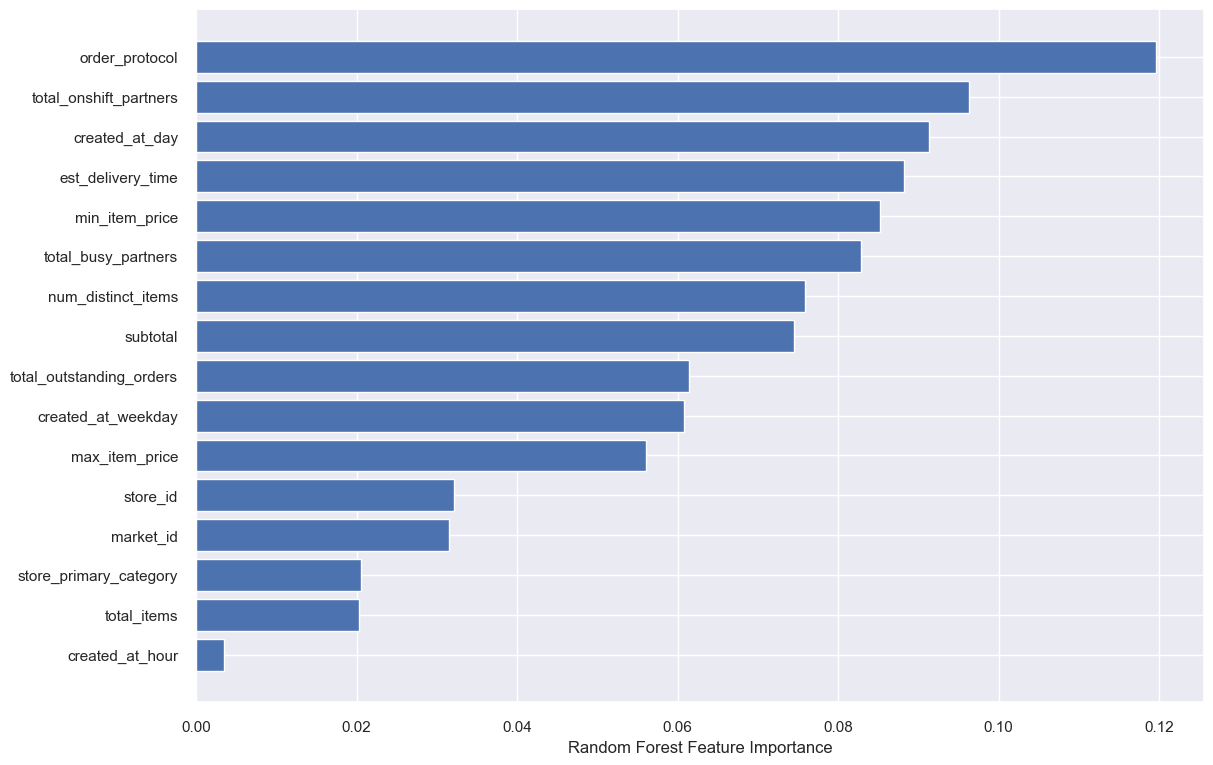

In [77]:
# Feature importance
sorted_idx = rf_pipeline.named_steps.regress.feature_importances_.argsort()
plt.barh(df.columns[sorted_idx], rf_pipeline.named_steps.regress.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [276]:
df.min_item_price.sort_values().head(20)

790      -86
187278   -52
170424   -51
46378    -48
46369    -35
77238    -31
104173   -30
91319    -13
119785    -9
119854    -7
165821    -6
1351      -1
171501     0
106100     0
15970      0
70137      0
171663     0
70134      0
70132      0
70131      0
Name: min_item_price, dtype: int64

In [87]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2,  random_state=42)

In [88]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((89522, 16), (22381, 16), (89522,), (22381,))

In [79]:
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(14,  kernel_initializer='normal', activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='linear'))

In [80]:
from tensorflow.keras.optimizers import Adam
adam=Adam(learning_rate=0.01)
model.compile(loss='mse', optimizer=adam, metrics=['mse','mae'])
history=model.fit(X_train, y_train, epochs=30, batch_size=512, verbose=1, validation_split=0.2)

Epoch 1/30


140/140 [==============================] - 3s 13ms/step - loss: 337.1044 - mse: 337.1044 - mae: 13.3976 - val_loss: 272.0665 - val_mse: 272.0665 - val_mae: 11.7224
Epoch 2/30
140/140 [==============================] - 2s 11ms/step - loss: 263.2864 - mse: 263.2864 - mae: 11.9374 - val_loss: 261.9411 - val_mse: 261.9411 - val_mae: 11.5533
Epoch 3/30
140/140 [==============================] - 2s 12ms/step - loss: 262.7605 - mse: 262.7605 - mae: 11.9194 - val_loss: 257.9019 - val_mse: 257.9019 - val_mae: 11.7628
Epoch 4/30
140/140 [==============================] - 2s 11ms/step - loss: 257.9039 - mse: 257.9039 - mae: 11.7917 - val_loss: 276.2947 - val_mse: 276.2947 - val_mae: 12.9174
Epoch 5/30
140/140 [==============================] - 2s 12ms/step - loss: 260.1217 - mse: 260.1217 - mae: 11.8650 - val_loss: 266.7138 - val_mse: 266.7138 - val_mae: 11.5656
Epoch 6/30
140/140 [==============================] - 2s 12ms/step - loss: 259.7028 - mse: 259.7028 - mae: 11.8389 - val_lo

In [89]:
nn_predict = model.predict(X_test)

700/700 [==============================] - 1s 2ms/step


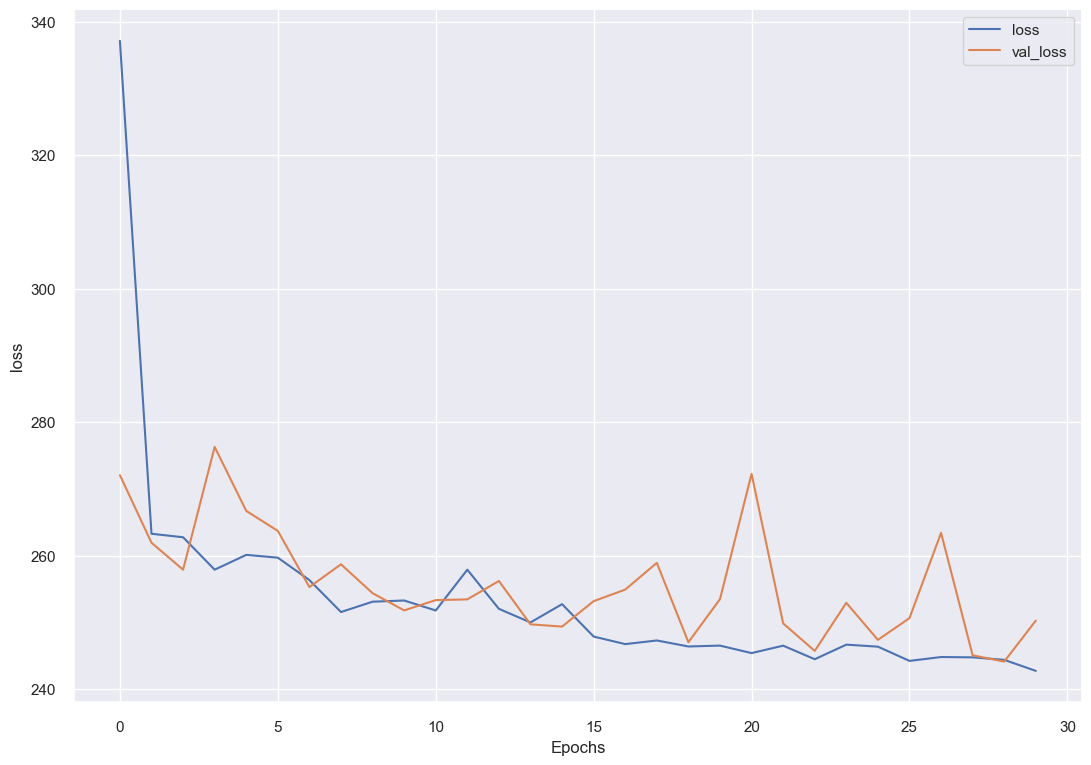

In [81]:
def plot_history(history, key):
  plt.plot(history.history[key])
  plt.plot(history.history['val_'+key])
  plt.xlabel("Epochs")
  plt.ylabel(key)
  plt.legend([key, 'val_'+key])
  plt.show()
# Plot the history
plot_history(history, 'loss')

In [84]:
prediction.shape

(27976,)

In [85]:
y_test

180602     44.866667
64595      47.166667
171679     67.400000
152830     39.516667
96531      59.166667
             ...    
104939     63.333333
23073     129.233333
83700      61.483333
178286     28.066667
50718      27.766667
Name: est_delivery_time, Length: 22381, dtype: float64

In [91]:
from sklearn.metrics import mean_absolute_percentage_error as MAPE
print("mape : ",MAPE(y_test, nn_predict))

mape :  0.2839596485279758


In [ ]:
# Check for outliers
sns.scatterplot(x='est_delivery_time', y='subtotal', data=df.dropna(), hue='order_protocol')

In [96]:
(df.total_onshift_partners.sort_values() < 0).sum()

21

In [97]:
(df.total_busy_partners.sort_values() < 0).sum()


21

In [100]:
(df.total_outstanding_orders.sort_values() < 0).sum()

42

In [101]:
df.nunique(dropna=False)

market_id                        6
created_at                  163082
actual_delivery_time        160686
store_id                      5645
store_primary_category          73
order_protocol                   7
total_items                     54
subtotal                      8189
num_distinct_items              20
min_item_price                2251
max_item_price                2586
total_onshift_partners         172
total_busy_partners            158
total_outstanding_orders       281
est_delivery_time             6984
created_at_day                  29
created_at_weekday               7
created_at_hour                 19
created_at_period                4
dtype: int64

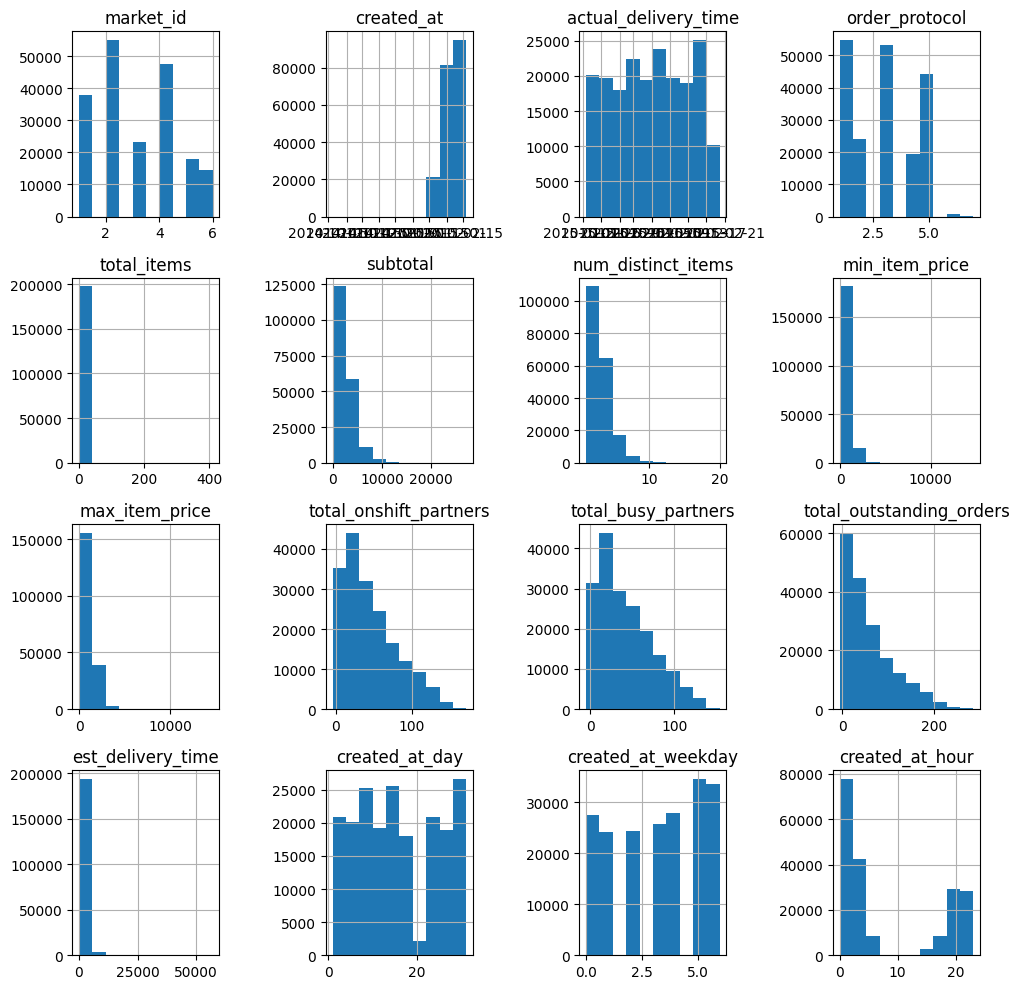

In [34]:
df.hist(figsize=(10,10))
plt.tight_layout()
plt.show()

<Axes: >

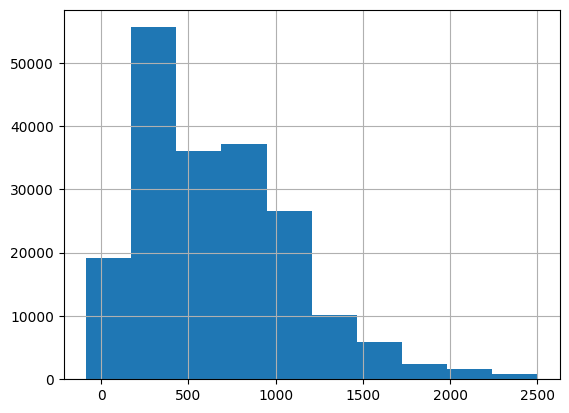

In [35]:
df[df.min_item_price < df.min_item_price.quantile(.99)].min_item_price.hist()

<Axes: >

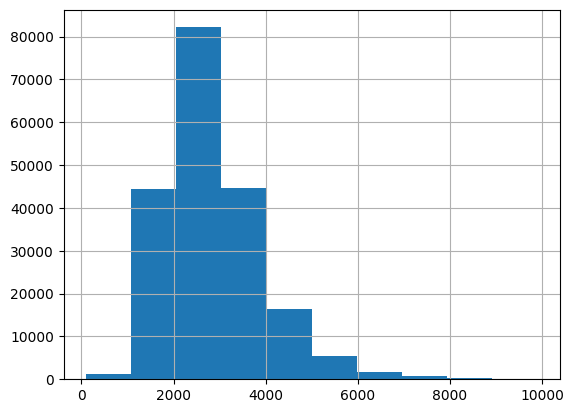

In [36]:
df[df.est_delivery_time < df.est_delivery_time.quantile(.999)].est_delivery_time.hist()

In [37]:
df.created_at = df.created_at.astype('int64') // 10**9

# The division by 10**9 is necessary because the timestamp is typically in nanoseconds, and dividing by 10**9 converts it to seconds.

In [38]:
df.actual_delivery_time = df.actual_delivery_time.astype('int64') // 10**9

In [ ]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(x)
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2,  random_state=42)